# <center>**LAB 1: DATA PRE-PROCESSING**


- Họ và tên: Võ Nguyễn Phương Quỳnh
- MSSV: 22127360
- Lớp: 22KHDL1

### 📝**Tự đánh giá**

<center>

| **STT** |         **Yêu cầu**       | **Đánh giá** |
|---------|---------------------------|--------------|
| 1       | Thu nhập dữ liệu          |    100%      | 
| 2       | Làm sạch - Data cleaning  |    100%      | 
| 3       | Feature selection         |    100%      | 
| 2       | Chuẩn hóa - Data Normalization  |    100%      | 
| 2       | Rời rạc hóa - Data Discritization |    100%      | 

## 1️⃣ **Chuẩn bị môi trường và dữ liệu**

### 📌 **1.1. Import thư viện**

- `pandas` để xử lý dữ liệu
- `numpy` để hỗ trợ tính toán
- `matplotlib.pyplot` và 'seaborn` để vẽ biểu đồ trực quan
- `ucimlrepo` để tải dataset Adult Census Income trực tiếp từ UCI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

Note: you may need to restart the kernel to use updated packages.


### 📌 **1.2. Import dữ liệu từ UCI**

Dataset "Adult Census Income" có thể được tải về trực tiếp từ UCI Repo bằng thư viện ucimlrepo.
- Tải dataset từ nguồn UCI.
- Kiểm tra thông tin sơ bộ về dataset.

In [2]:
# Tải dataset từ UCI Repository
adult = fetch_ucirepo(id=2)  

# Lấy dữ liệu và chia thành features (X) và target (y)
X = adult.data.features  
y = adult.data.targets  

# Gộp lại thành một dataframe duy nhất để dễ thao tác
df = pd.concat([X, y], axis=1)

# Xem thông tin cơ bản về dataset
print("Thông tin dataset:")
df.info()

# Xem 5 dòng đầu tiên
df.head()

df.to_csv('adult.csv', index=False)

Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Dữ liệu gồm 48,882 dòng, mỗi dòng có 14 trường thuộc tính, trong đó `income` là thuộc tính target, xác định mẫu có income >= 50K$ hay không.

| **Tên thuộc tính**    | **Loại**       | **Nhóm**             | **Mô tả**                                     | **Giá trị khả dụng** | **Missing value** |
|----------------------|--------------|---------------------|---------------------------------|------------------|-------------|
| age                 | Số nguyên     | Tuổi                | Tuổi của cá nhân               | N/A              | Không       |
| workclass           | Phân loại     | Thu nhập            | Loại công việc                 | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. | Có         |
| fnlwgt              | Số nguyên     |                     | Trọng số cuối của khảo sát     | N/A              | Không       |
| education           | Phân loại     | Trình độ học vấn    | Mức độ giáo dục                | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. | Không     |
| education-num       | Số nguyên     | Trình độ học vấn    | Số năm học tập                 | N/A              | Không       |
| marital-status      | Phân loại     | Khác                | Tình trạng hôn nhân            | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. | Không     |
| occupation          | Phân loại     | Khác                | Nghề nghiệp                    | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. | Có        |
| relationship        | Phân loại     | Khác                | Mối quan hệ với chủ hộ         | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. | Không    |
| race               | Phân loại     | Chủng tộc           | Chủng tộc                      | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. | Không    |
| sex                | Nhị phân      | Giới tính           | Giới tính                      | Female, Male. | Không       |
| capital-gain       | Số nguyên     |                     | Thu nhập từ vốn                | N/A              | Không       |
| capital-loss       | Số nguyên     |                     | Lỗ vốn                         | N/A              | Không       |
| hours-per-week     | Số nguyên     |                     | Số giờ làm việc mỗi tuần       | N/A              | Không       |
| native-country     | Phân loại     | Khác                | Quốc gia xuất xứ               | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. | Có        |
| income             | Nhị phân      | Thu nhập            | Mức thu nhập                    | >50K, <=50K. | Không       |


In [4]:
number_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

## 2️⃣ **Data Cleaning**

Dữ liệu thực tế có thể bị thiếu, lỗi, chứa thông tin nhiễu do lỗi nhập liệu hoặc sai sót trong quá trình thu thập. Cần có các bước xử lí và làm sạch để đảm bảo độ chính xác và tin cậy của dữ liệu.

### 📌 **2.1. Kiểm tra & xử lý missing values**
💡 **Mục tiêu:**
- Xác định cột nào có missing values.
- Quyết định giữ lại hoặc thay thế dữ liệu bị thiếu.

⌨️ **Thực hiện:**
- Dùng `.isnull().sum()` để kiểm tra số lượng giá trị bị thiếu ở từng cột.
- Nếu có missing values, có thể:
    - Loại bỏ các hàng thiếu dữ liệu (`dropna()`) nếu số lượng quá ít.
    - Điền giá trị thay thế (`fillna()`) nếu dữ liệu quan trọng:
        - Trung vị (median) cho dữ liệu số.
        - Sử dụng Decision Tree ID3 cho dữ liệu phân loại.

Số lượng giá trị thiếu trong dataset:
workclass         963
occupation        966
native-country    274
dtype: int64


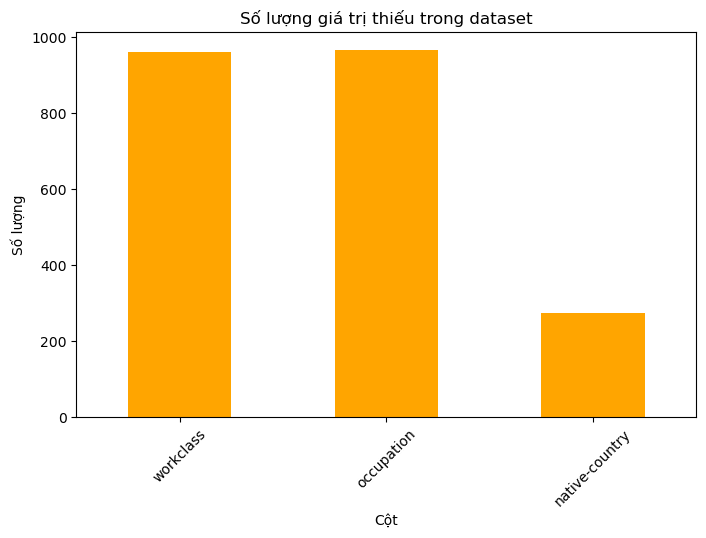

In [5]:
df = pd.read_csv('adult.csv')

# Kiểm tra số lượng giá trị thiếu trong mỗi cột
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Chỉ hiển thị các cột có giá trị thiếu

# Hiển thị kết quả
print("Số lượng giá trị thiếu trong dataset:")
print(missing_values)

# Vẽ biểu đồ số lượng giá trị thiếu trong mỗi cột
plt.figure(figsize=(8, 5))
missing_values.plot(kind="bar", color="orange")
plt.title("Số lượng giá trị thiếu trong dataset")
plt.xlabel("Cột")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.show()


Dataset có 3 cột có giá trị thiếu, đúng với thông tin trang web nguồn cung cấp:
- `workclass`: 963 giá trị thiếu.
- `occupation`: 966 giá trị thiếu.
- `native-country`: 274 giá trị thiếu.

Đây đều là **dữ liệu phân loại** nên ta sẽ tiến hành đi xử lí bằng **Decision Tree ID3**.

Text(0.5, 1.0, 'native-country')

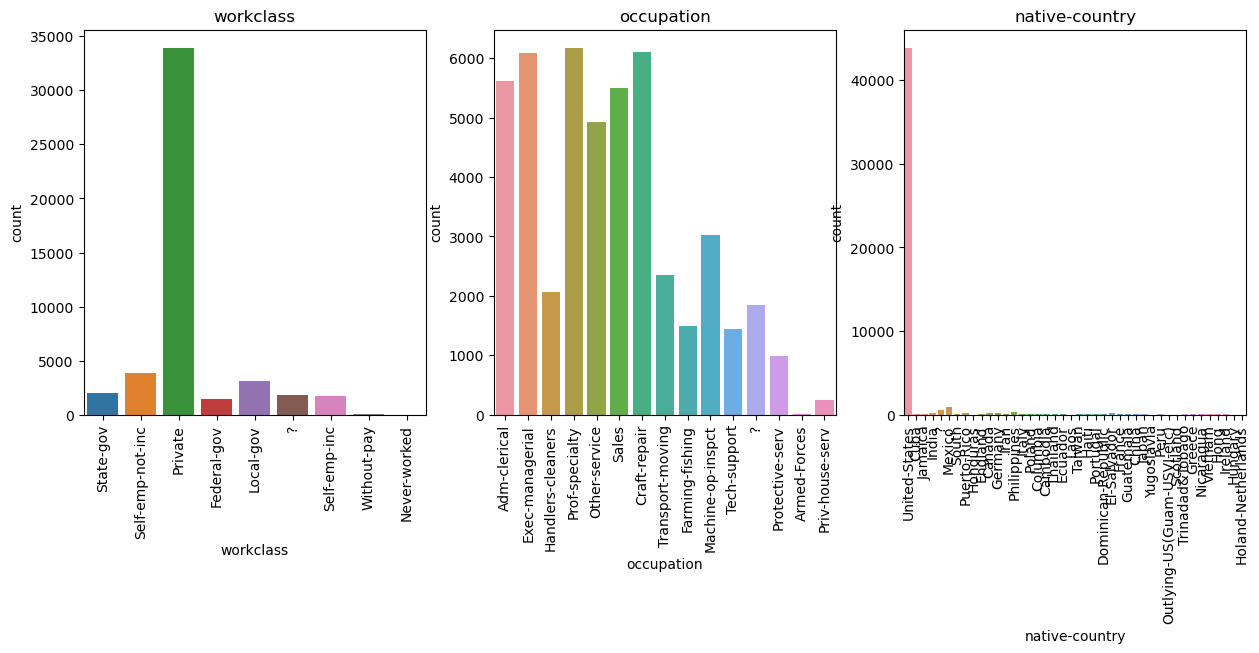

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='workclass')
plt.xticks(rotation=90)
plt.title('workclass')
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='occupation')
plt.xticks(rotation=90)
plt.title('occupation')
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='native-country')
plt.xticks(rotation=90)
plt.title('native-country')

Nhận thấy, tồn tại giá trị "?" tương đương với NaN -> Chuyển giá trị này về NaN.

In [7]:
# Thay thế giá trị "?" thành NaN
df.replace("?", np.nan, inplace=True)

Số lượng giá trị thiếu trong dataset:
workclass         2799
occupation        2809
native-country     857
dtype: int64


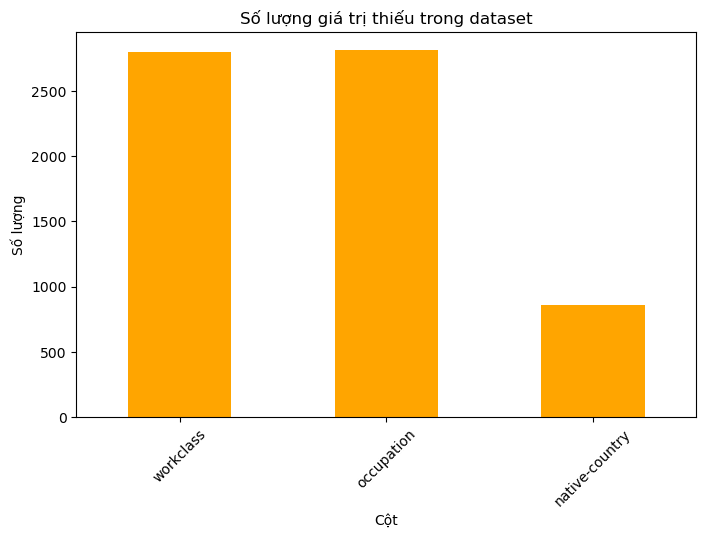

In [8]:
# Kiểm tra số lượng giá trị thiếu trong mỗi cột
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Chỉ hiển thị các cột có giá trị thiếu

# Hiển thị kết quả
print("Số lượng giá trị thiếu trong dataset:")
print(missing_values)

# Vẽ biểu đồ số lượng giá trị thiếu trong mỗi cột
plt.figure(figsize=(8, 5))
missing_values.plot(kind="bar", color="orange")
plt.title("Số lượng giá trị thiếu trong dataset")
plt.xlabel("Cột")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'native-country')

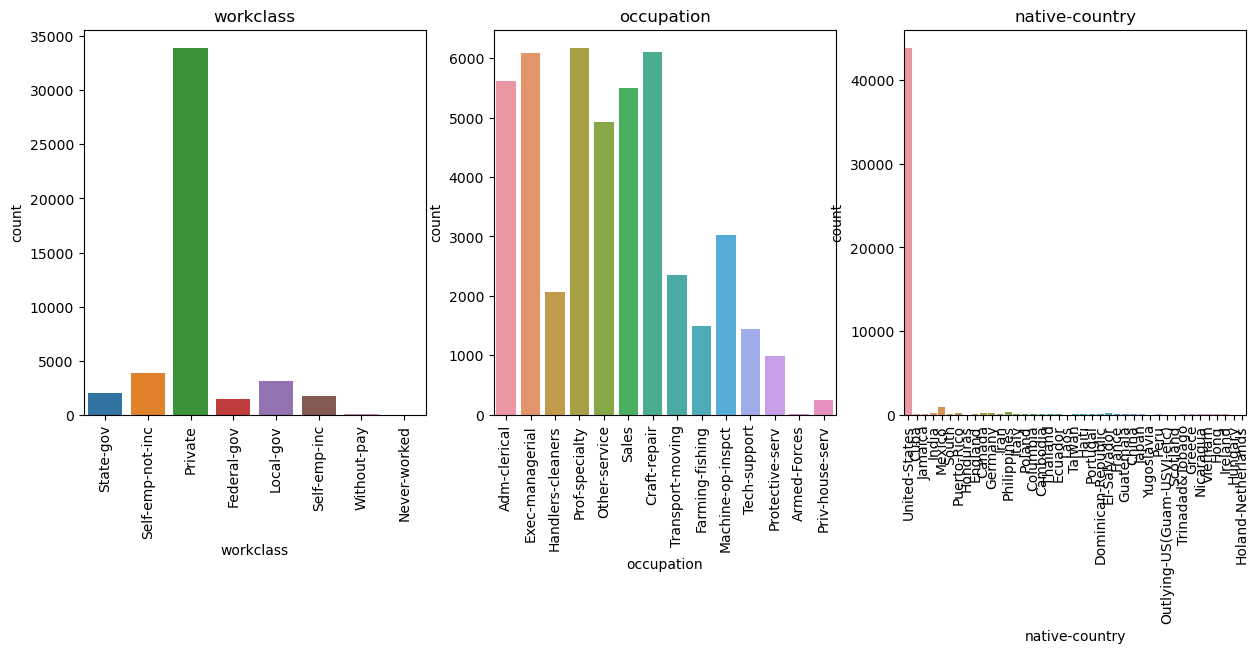

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='workclass')
plt.xticks(rotation=90)
plt.title('workclass')
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='occupation')
plt.xticks(rotation=90)
plt.title('occupation')
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='native-country')
plt.xticks(rotation=90)
plt.title('native-country')

#### ***Decision Tree ID3***

- Xây dựng Decision Tree đơn giản để phân loại dữ liệu thiếu.
- Tính toán mức độ quan trọng của feature bằng cách sử dụng entropy (ID3).
- Dự đoán giá trị thiếu dựa vào các giá trị phổ biến nhất trong từng nhóm dữ liệu.

**Xây dựng class Decision Tree với các hàm cần thiết**:
- Entropy: đo độ hỗn loạn của dữ liệu.
- Information Gain: tìm feature phân loại tốt nhất.

In [10]:
class DecisionTree:
    def __init__(self, depth=5):
        self.depth = depth
        self.tree = None

    def _entropy(self, y):
        """Tính Entropy của tập dữ liệu."""
        values, counts = np.unique(y, return_counts=True)
        probs = counts / counts.sum()
        return -np.sum(probs * np.log2(probs))

    def _information_gain(self, X, y, feature_index):
        """Tính Information Gain của một feature để chọn đặc trưng tốt nhất."""
        total_entropy = self._entropy(y)
        values, counts = np.unique(X[:, feature_index], return_counts=True)
        
        # Tính Entropy có trọng số cho các nhóm con
        weighted_entropy = sum(
            (counts[i] / np.sum(counts)) * self._entropy(y[X[:, feature_index] == values[i]])
            for i in range(len(values))
        )
        return total_entropy - weighted_entropy

    def fit(self, X, y, depth=0):
        """Huấn luyện cây quyết định bằng thuật toán ID3."""
        if depth >= self.depth or len(set(y)) == 1:
            return np.bincount(y).argmax()  # Trả về nhãn phổ biến nhất

        # Chọn đặc trưng tốt nhất dựa trên Information Gain
        best_feature = np.argmax([self._information_gain(X, y, i) for i in range(X.shape[1])])
        tree = {best_feature: {}}
        
        # Xây dựng cây con cho từng giá trị của đặc trưng tốt nhất
        for value in np.unique(X[:, best_feature]):
            subset_X = X[X[:, best_feature] == value]
            subset_y = y[X[:, best_feature] == value]
            tree[best_feature][value] = self.fit(subset_X, subset_y, depth + 1)
        return tree

    def predict(self, tree, sample):
        """Dự đoán một mẫu dữ liệu dựa trên cây quyết định đã huấn luyện."""
        if not isinstance(tree, dict):
            return tree  # Trả về nhãn dự đoán nếu là nút lá
        
        feature = list(tree.keys())[0]  # Lấy đặc trưng phân nhánh
        value = sample[feature] if feature < len(sample) else -1  # Lấy giá trị đặc trưng
        
        # Dự đoán dựa trên giá trị đặc trưng hoặc chọn ngẫu nhiên nếu không có giá trị phù hợp
        return self.predict(tree[feature].get(value, np.random.choice(list(tree[feature].values()))), sample)

**Điền Missing Values bằng Decision Tree:**

Trước khi huấn luyện Decision Tree, ta cần chuyển đổi dữ liệu dạng chuỗi thành số (Label Encoding).

In [11]:
# Hàm mã hóa dữ liệu categorical trước khi dùng Decision Tree
def encode_dataframe(df2, mappings=None):
    mappings = {}
    df = df2.copy(deep=True)
    df_encoded = df2.copy(deep=True)

    for col in df.columns:
        if df[col].dtype == "object":
            # Thay thế NaN bằng "None" trước khi chuyển thành int
            df[col] = df[col].fillna("None")
            unique_vals = df[col].dropna().unique()
            mappings[col] = {val: idx for idx, val in enumerate(unique_vals)}
            df_encoded[col] = df[col].map(mappings[col]).astype(int)
    
    return df_encoded, mappings

# Hàm giải mã sau khi điền missing values
def decode_dataframe(df_encoded, mappings):
    df_decoded = df_encoded.copy(deep=True)
    
    for col, mapping in mappings.items():
        reverse_mapping = {v: k for k, v in mapping.items()}
        df_decoded[col] = df_encoded[col].map(reverse_mapping)
    
    return df_decoded


Với mỗi cột có missing values, ta dùng các cột còn lại (mà không có giá trị trống) để dự đoán giá trị bị thiếu. Chia dữ liệu thành X_train (các cột có giá trị) và y_train (cột bị thiếu).

In [12]:
def fill_missing_values(df, col):
    """Điền giá trị thiếu cho một cột bằng Decision Tree."""
    tree = DecisionTree(depth=5)
    df_encoded, label_encoders = encode_dataframe(df)
    
    df_notnull = df_encoded[df[col].notnull()]
    df_null = df_encoded[df[col].isnull()]

    if df_null.empty:
        print(">Khoong co co gia tri thieu")
        return df  # Không có giá trị thiếu để điền

    X_train = df_notnull.drop(columns=[col]).values  # Dữ liệu huấn luyện
    y_train = df_notnull[col].values  # Nhãn tương ứng
    X_test = df_null.drop(columns=[col]).values  # Dữ liệu cần dự đoán

    # Huấn luyện mô hình Decision Tree
    tree_model = tree.fit(X_train, y_train)
    
    # Dự đoán giá trị thiếu
    predictions = np.array([tree.predict(tree_model, x) for x in X_test], dtype=int)
    df_encoded.loc[df_null.index, col] = predictions
    
    df = decode_dataframe(df_encoded, label_encoders)
    df.replace("None", np.nan, inplace=True)
    
    return df

In [13]:
missing_cols = ['workclass', 'occupation', 'native-country']

for col in missing_cols:
    df = fill_missing_values(df, col)

**Kiểm tra lại kết quả**

In [14]:
missing_after = df.isnull().sum()
missing_after

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Vậy là dữ liệu đã được lấp đầy rồi!

### 📌 **2.2 Kiểm tra & loại bỏ dữ liệu trùng lặp**
💡 **Mục tiêu:**
- Xác định xem có bản ghi nào trùng lặp hay không.
- Loại bỏ nếu có.

⌨️ **Thực hiện:**
- Dùng `.duplicated().sum()` để kiểm tra số lượng dòng trùng lặp.
- Nếu có, dùng `.drop_duplicates()` để loại bỏ các dòng trùng.

In [15]:
# Kiểm tra số lượng dòng trùng lặp
duplicate_rows = df.duplicated().sum()
print(f"Số lượng dòng trùng lặp: {duplicate_rows}")

# Xóa các dòng trùng lặp nếu có
df.drop_duplicates(inplace=True)
print("Đã xóa các dòng trùng lặp.")

Số lượng dòng trùng lặp: 37
Đã xóa các dòng trùng lặp.


### 📌 **2.3. Encoding**

Ta sẽ thực hiện encode các thuộc tính phân loại (categorical feature)

In [16]:
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

**Binary encoding:**

Thực hiện Binary Encoding với các thuộc tính: 
- `income` --> `is >50K'
- `sex` --> `is-male`: giá trị trong cột này được xác định như sau: nếu sex có giá trị "Male" thì is Male có giá trị là 0, nếu sex có giá trị "Female" thì is Male có giá trị là 1

In [17]:
df['income'].value_counts()

<=50K     24695
<=50K.    12426
>50K       7838
>50K.      3846
Name: income, dtype: int64

In [18]:
df['sex'].value_counts()

Male      32626
Female    16179
Name: sex, dtype: int64

c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


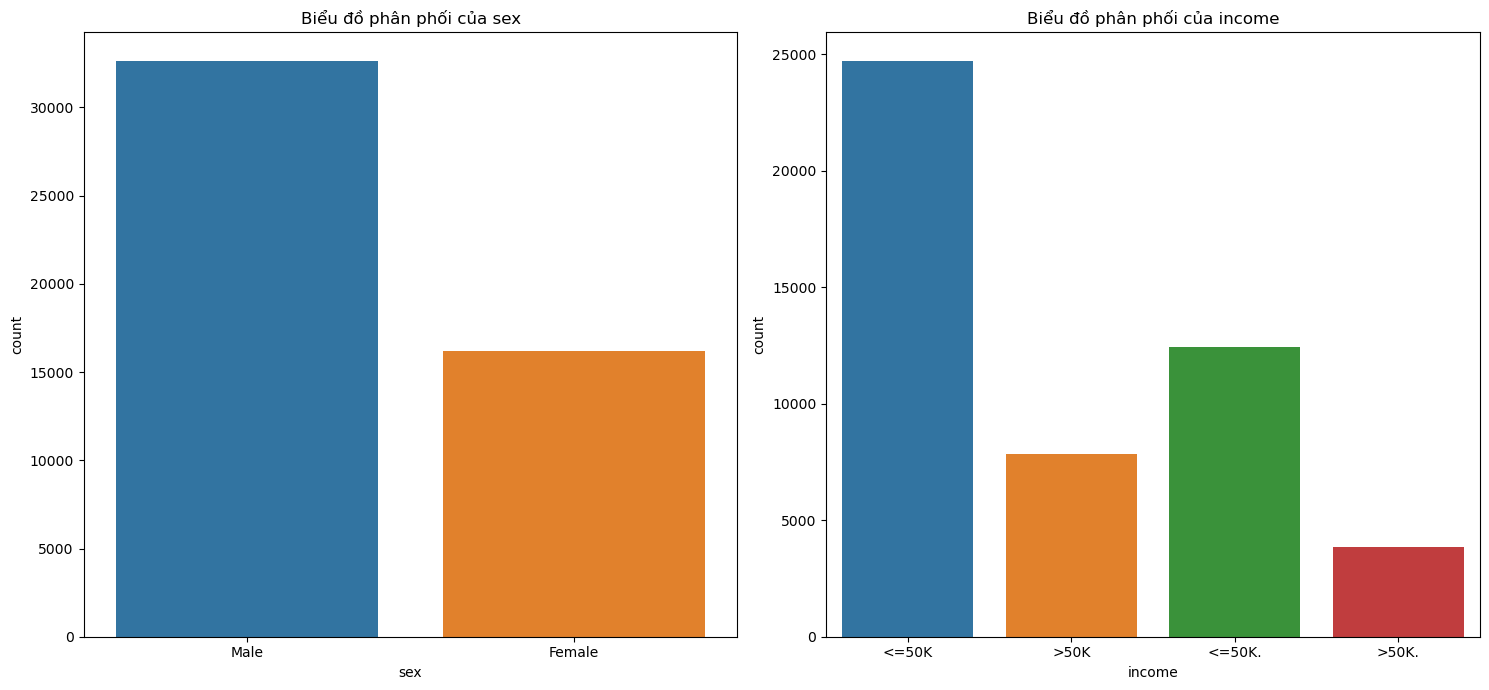

In [19]:
#histogram 3 cột ``capital-gain`, `capital-loss` và `income`
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.countplot(df["sex"])
plt.title("Biểu đồ phân phối của sex")
plt.subplot(1, 2, 2)
sns.countplot(df["income"])
plt.title("Biểu đồ phân phối của income")
plt.tight_layout()  
plt.show()

In [20]:
df['is-male'] = np.where(df['sex'] == 'Male', 1, 0)
df[['sex', 'is-male']].head(10)

,sex,is-male
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Female,0
5,Female,0
6,Female,0
7,Male,1
8,Female,0
9,Male,1


In [21]:
df['>50K'] = np.where((df['income'] == ">50K") | (df['income'] == "50K."), 1, 0)
df[['income', '>50K']].head(10)

,income,>50K
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
5,<=50K,0
6,<=50K,0
7,>50K,1
8,>50K,1
9,>50K,1


c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


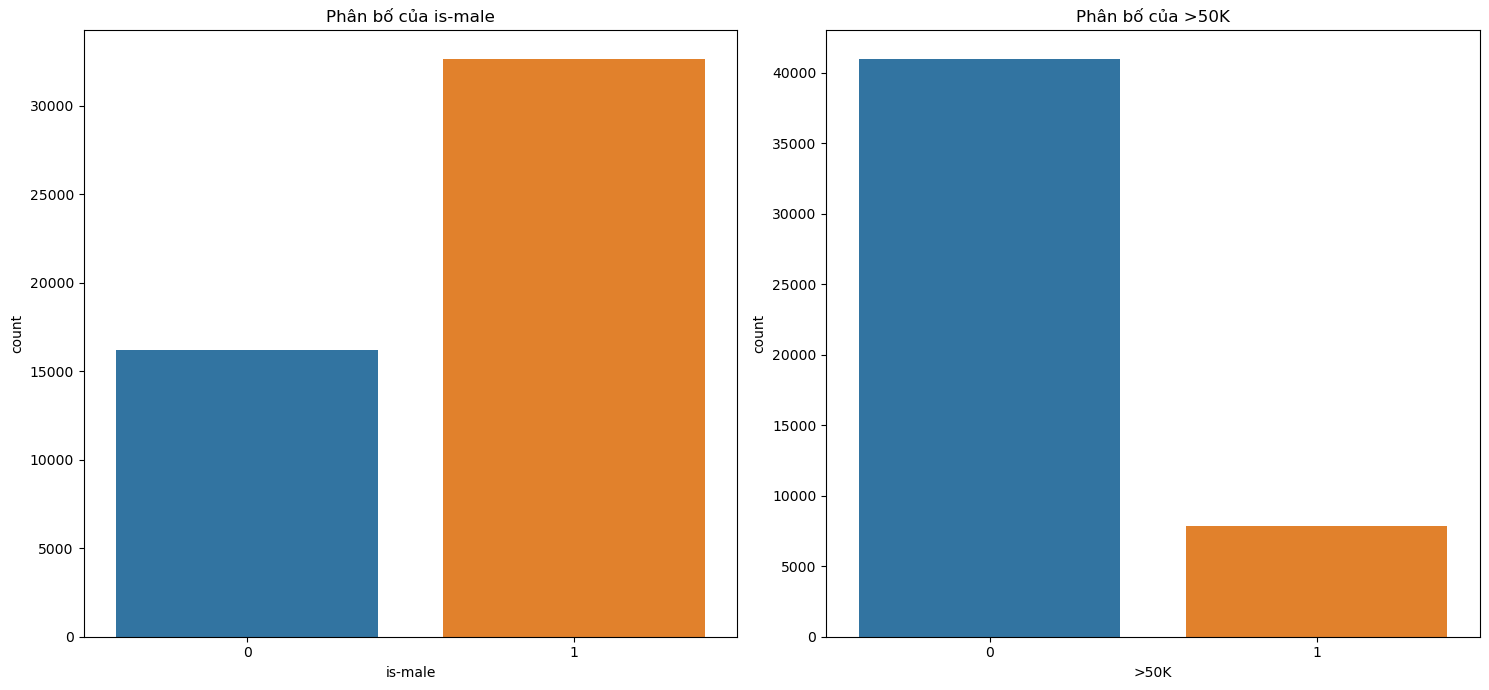

In [22]:
#phân bố 3 cột ``capital-gain`, `capital-loss` và `income`

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.countplot(df["is-male"])
plt.title("Phân bố của is-male")
plt.subplot(1, 2, 2)
sns.countplot(df[">50K"])
plt.title("Phân bố của >50K")

plt.tight_layout()
plt.show()


**Encoding feature `marital-status`:**

Thực hiện one-hot encoding thế nhưng gom 3 cột "Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse" thành 1 cột "Married"

In [23]:
df['marital-status'].value_counts()

Married-civ-spouse       22369
Never-married            16094
Divorced                  6629
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


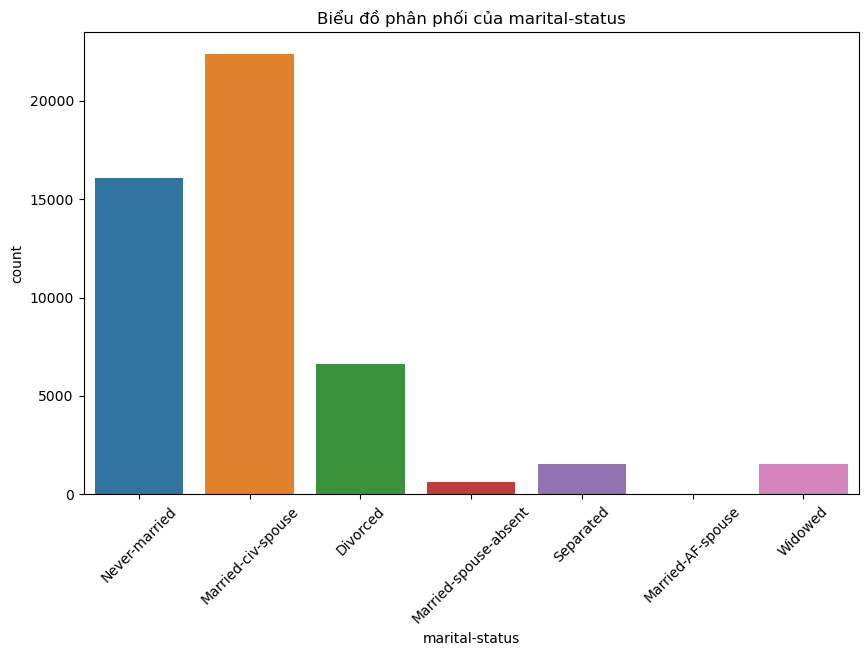

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(df["marital-status"])
plt.title("Biểu đồ phân phối của marital-status")
plt.xticks(rotation=45)
plt.show()

In [25]:
df['Married'] = np.where((df['marital-status'] == 'Married-civ-spouse') | (df['marital-status'] == 'Married-spouse-absent') | (df['marital-status'] =='Married-AF-spouse'),1,0)
df['Never-married'] = np.where((df['marital-status'] =='Never-married' ),1,0)
df['Separated'] = np.where((df['marital-status'] =='Separated' ),1,0)
df['Widowed'] = np.where((df['marital-status'] =='Widowed' ),1,0)
df['Divorced'] = np.where((df['marital-status'] =='Divorced' ),1,0)

df[['marital-status','Married','Never-married','Separated','Widowed','Divorced']]

,marital-status,Married,Never-married,Separated,Widowed,Divorced
0,Never-married,0,1,0,0,0
1,Married-civ-spouse,1,0,0,0,0
2,Divorced,0,0,0,0,1
3,Married-civ-spouse,1,0,0,0,0
4,Married-civ-spouse,1,0,0,0,0
...,...,...,...,...,...,...
48837,Divorced,0,0,0,0,1
48838,Widowed,0,0,0,1,0
48839,Married-civ-spouse,1,0,0,0,0
48840,Divorced,0,0,0,0,1


**Encoding feature `education`:**

Thực hiện ordinal encoding thuộc tính này. 

In [26]:
df['education'].value_counts()

HS-grad         15775
Some-college    10864
Bachelors        8020
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1388
7th-8th           954
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           245
Preschool          82
Name: education, dtype: int64

c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


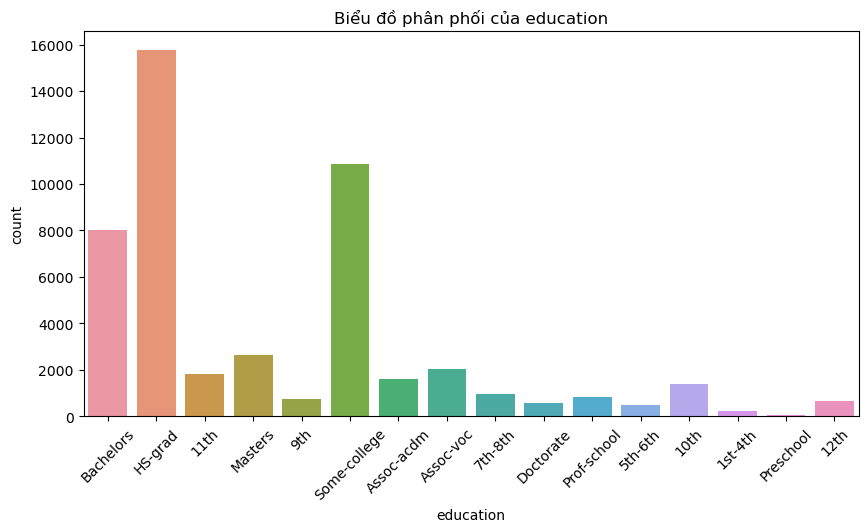

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(df["education"])
plt.title("Biểu đồ phân phối của education")
plt.xticks(rotation=45)
plt.show()

Tạo cột education level như sau:

In [28]:
education_order = {
    "Preschool": 0,
    "1st-4th": 1,
    "5th-6th": 2,
    "7th-8th": 3,
    "9th": 4,
    "10th": 5,
    "11th": 6,
    "12th": 7,
    "HS-grad": 8,
    "Some-college": 9,
    "Assoc-voc": 10,
    "Assoc-acdm": 11,
    "Bachelors": 12,
    "Masters": 13,
    "Prof-school": 14,
    "Doctorate": 15
}

# Tạo hàm ánh xạ từ từ điển education_order
def get_education_level(education):
    return education_order.get(education, np.nan)  # trả về np.nan nếu không tìm thấy trong từ điển

# Áp dụng hàm get_education_level cho toàn bộ cột 'education' với numpy.vectorize
df['education_level'] = np.vectorize(get_education_level)(df['education'])

# Kiểm tra kết quả
df[['education', 'education_level']].head(10)

,education,education_level
0,Bachelors,12
1,Bachelors,12
2,HS-grad,8
3,11th,6
4,Bachelors,12
5,Masters,13
6,9th,4
7,HS-grad,8
8,Masters,13
9,Bachelors,12


c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


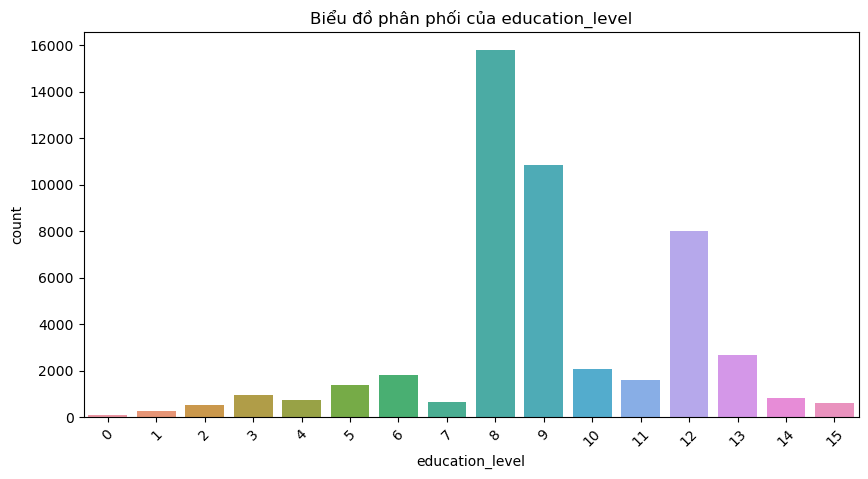

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(df["education_level"])
plt.title("Biểu đồ phân phối của education_level")
plt.xticks(rotation=45)
plt.show()

**Encoding feature `occupation`:**

Gom các giá trị của cột occupation thành các nhóm nghề sau:
- Management : Exec-managerial, Prof-specialty, Tech-support
- Technical : Craft-repair, Machine-op-inspct, Transport-moving, Farming-fishing, Handlers-cleaners
- Service: Other-service, Protective-serv, Priv-house-serv
- Office: Adm-clerical, Sales
- Armed-Forces Tạo các cột Management, Technical, Service, Office, Armed-Forces như sau:

In [30]:
df['occupation'].value_counts()

Prof-specialty       6479
Craft-repair         6434
Exec-managerial      6397
Adm-clerical         6009
Sales                5853
Other-service        5294
Machine-op-inspct    3187
Transport-moving     2496
Handlers-cleaners    2213
Farming-fishing      1574
Tech-support         1547
Protective-serv      1045
Priv-house-serv       261
Armed-Forces           16
Name: occupation, dtype: int64

c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


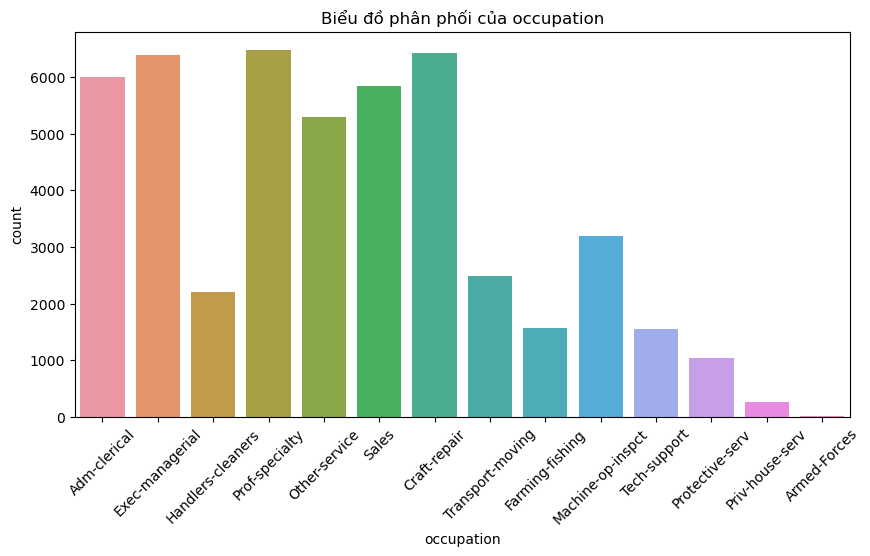

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(df["occupation"])
plt.title("Biểu đồ phân phối của occupation")
plt.xticks(rotation=45)
plt.show()

In [32]:
df['Management'] = np.where((df['occupation'] == 'Exec-managerial') | 
                           (df['occupation'] == 'Prof-specialty') | 
                           (df['occupation'] == 'Tech-support'), 1, 0)
# Tạo cột 'Technical' cho các nghề kỹ thuật và sản xuất
df['Technical'] = np.where((df['occupation'] == 'Craft-repair') | 
                          (df['occupation'] == 'Machine-op-inspct') | 
                          (df['occupation'] == 'Transport-moving') | 
                          (df['occupation'] == 'Farming-fishing') | 
                          (df['occupation'] == 'Handlers-cleaners'), 1, 0)

# Tạo cột 'Service' cho các nghề dịch vụ
df['Service'] = np.where((df['occupation'] == 'Other-service') | 
                        (df['occupation'] == 'Protective-serv') | 
                        (df['occupation'] == 'Priv-house-serv'), 1, 0)

# Tạo cột 'Office' cho các nghề văn phòng
df['Office'] = np.where((df['occupation'] == 'Adm-clerical') | 
                       (df['occupation'] == 'Sales'), 1, 0)

# Tạo cột 'Armed-Forces' cho các nghề trong lực lượng vũ trang
df['Armed-Forces'] = np.where(df['occupation'] == 'Armed-Forces', 1, 0)

# Kiểm tra kết quả
df[['occupation', 'Management', 'Technical', 'Service', 'Office', 'Armed-Forces']].head(10)

,occupation,Management,Technical,Service,Office,Armed-Forces
0,Adm-clerical,0,0,0,1,0
1,Exec-managerial,1,0,0,0,0
2,Handlers-cleaners,0,1,0,0,0
3,Handlers-cleaners,0,1,0,0,0
4,Prof-specialty,1,0,0,0,0
5,Exec-managerial,1,0,0,0,0
6,Other-service,0,0,1,0,0
7,Exec-managerial,1,0,0,0,0
8,Prof-specialty,1,0,0,0,0
9,Exec-managerial,1,0,0,0,0


**Encoding feature `relationship`:** 

One-hot encoding

In [33]:
df['relationship'].value_counts()

Husband           19707
Not-in-family     12567
Own-child          7571
Unmarried          5124
Wife               2330
Other-relative     1506
Name: relationship, dtype: int64

c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


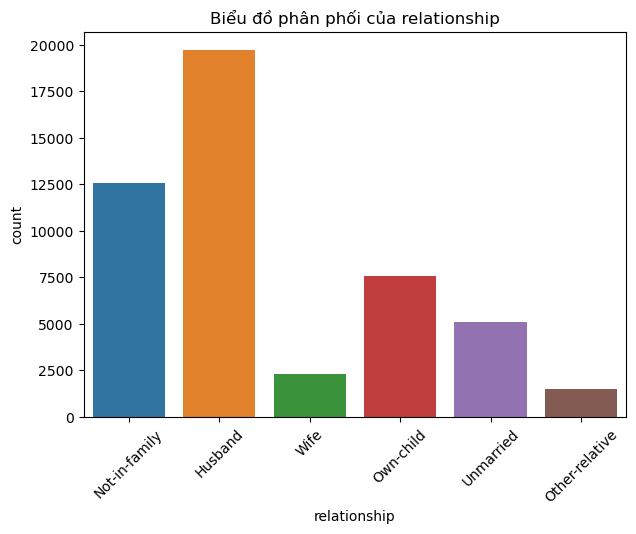

In [34]:
plt.figure(figsize=(7, 5))
sns.countplot(df["relationship"])
plt.title("Biểu đồ phân phối của relationship")
plt.xticks(rotation=45)
plt.show()

In [35]:
df['Husband'] = np.where((df['relationship'] == 'Husband'),1,0 )
df['Not-in-family'] = np.where((df['relationship'] == 'Not-in-family'),1,0 )
df['Own-child'] = np.where((df['relationship'] == 'Own-child'),1,0 )
df['Unmarried'] = np.where((df['relationship'] == 'Unmarried'),1,0 )
df['Wife'] = np.where((df['relationship'] == 'Wife'),1,0 )
df['Other-relative'] = np.where((df['relationship'] == 'Other-relative'),1,0 )

df[['relationship','Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative']].head(10)

,relationship,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
0,Not-in-family,0,1,0,0,0,0
1,Husband,1,0,0,0,0,0
2,Not-in-family,0,1,0,0,0,0
3,Husband,1,0,0,0,0,0
4,Wife,0,0,0,0,1,0
5,Wife,0,0,0,0,1,0
6,Not-in-family,0,1,0,0,0,0
7,Husband,1,0,0,0,0,0
8,Not-in-family,0,1,0,0,0,0
9,Husband,1,0,0,0,0,0


**Encoding feature `race`:** 

One-hot encoding

In [36]:
df['race'].value_counts()

White                 41727
Black                  4684
Asian-Pac-Islander     1518
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


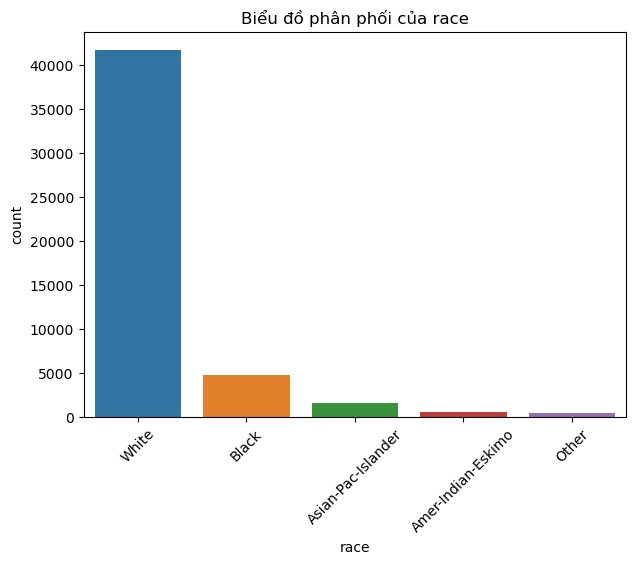

In [37]:
plt.figure(figsize=(7, 5))
sns.countplot(df["race"])
plt.title("Biểu đồ phân phối của race")
plt.xticks(rotation=45)
plt.show()

In [38]:
df['White'] = np.where((df['race'] == 'White'),1,0)
df['Black'] = np.where((df['race'] == 'Black'),1,0)
df['Asian-Pac-Islander'] = np.where((df['race'] == 'Asian-Pac-Islander'),1,0)
df['Amer-Indian-Eskimo'] = np.where((df['race'] == 'Amer-Indian-Eskimo'),1,0)
df['Other race'] = np.where((df['race'] == 'Other'),1,0)

df[['race','White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other race']].head(10)

,race,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other race
0,White,1,0,0,0,0
1,White,1,0,0,0,0
2,White,1,0,0,0,0
3,Black,0,1,0,0,0
4,Black,0,1,0,0,0
5,White,1,0,0,0,0
6,Black,0,1,0,0,0
7,White,1,0,0,0,0
8,White,1,0,0,0,0
9,White,1,0,0,0,0


**Encoding feature `native-country`:** 

One-hot encoding

In [39]:
df['native-country'].value_counts(normalize = True)*100

United-States                 91.173036
Mexico                         1.977256
Philippines                    0.637230
Germany                        0.430284
Puerto-Rico                    0.389304
Canada                         0.379060
India                          0.325786
El-Salvador                    0.321688
Cuba                           0.301199
England                        0.272513
China                          0.264317
South                          0.256121
Dominican-Republic             0.231534
Jamaica                        0.223338
Italy                          0.221289
Japan                          0.202848
Columbia                       0.188505
Vietnam                        0.188505
Guatemala                      0.184407
Poland                         0.184407
Haiti                          0.157771
Taiwan                         0.149575
Portugal                       0.139330
Iran                           0.120889
Greece                         0.104497


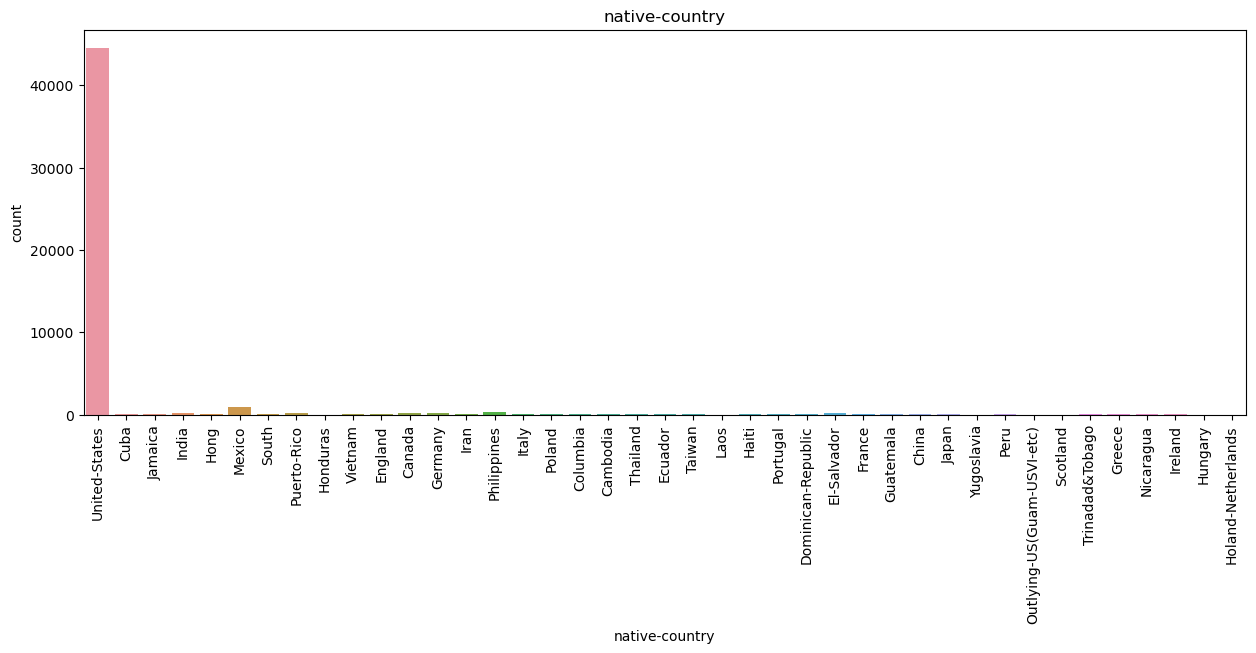

In [40]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='native-country')
plt.xticks(rotation=90)
plt.title('native-country')
plt.show()

Vì số lượng giá trị ở cột `native-country` laf "United-States" chiếm đến 91% dữ liệu. Do đó ta sẽ thực hiện binary score. Tạo cột `is-USA`, giá trị được xác định dựa vào cột `native-country` với "United-States" và "Outlying-US(Guam-USVI-etc)" là 1

In [41]:
df['is-USA'] = np.where((df['native-country'] == 'United-States') | (df['native-country'] == 'Outlying-US(Guam-USVI-etc)'),1,0)
df[['is-USA','native-country']]

,is-USA,native-country
0,1,United-States
1,1,United-States
2,1,United-States
3,1,United-States
4,0,Cuba
...,...,...
48837,1,United-States
48838,1,United-States
48839,1,United-States
48840,1,United-States


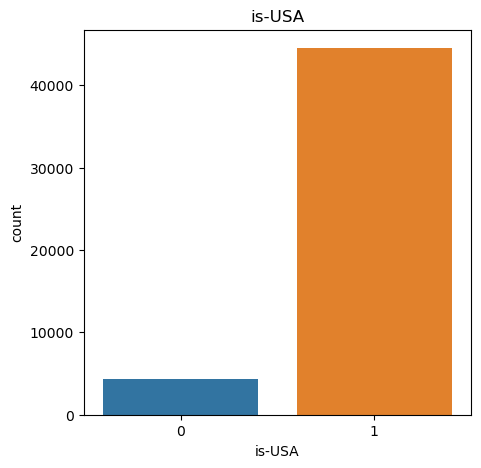

In [42]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='is-USA')
plt.title('is-USA')
plt.show()

**Encoding feature `workclass`:** 

One-hot encoding

In [43]:
df['workclass'].value_counts()

Private             35932
Self-emp-not-inc     4101
Local-gov            3347
State-gov            2092
Self-emp-inc         1791
Federal-gov          1511
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

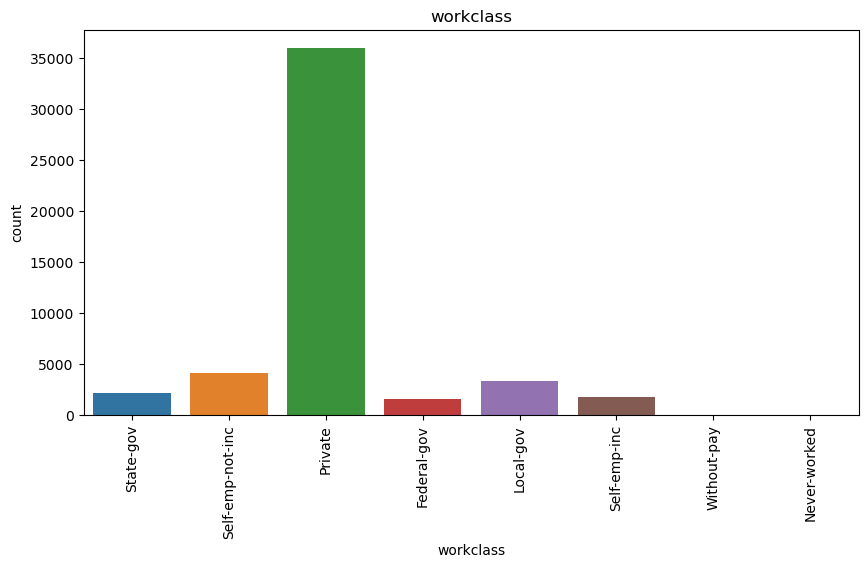

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='workclass')
plt.xticks(rotation=90)
plt.title('workclass')
plt.show()

In [45]:
df['Private'] = np.where((df['workclass'] == 'Private'),1,0)
df['Self-emp-not-inc'] = np.where((df['workclass'] == 'Self-emp-not-inc'),1,0)
df['Local-gov'] = np.where((df['workclass'] == 'Local-gov'),1,0)
df['State-gov'] = np.where((df['workclass'] == 'State-gov'),1,0)
df['Self-emp-inc'] = np.where((df['workclass'] == 'Self-emp-inc'),1,0)
df['Federal-gov'] = np.where((df['workclass'] == 'Federal-gov'),1,0)
df['Other workclass'] = np.where((df['workclass'] == 'Without-pay') | (df['workclass'] == 'Never-worked'),1,0)
df[['workclass','Private','Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Other workclass']].head(10)

,workclass,Private,Self-emp-not-inc,Local-gov,State-gov,Self-emp-inc,Federal-gov,Other workclass
0,State-gov,0,0,0,1,0,0,0
1,Self-emp-not-inc,0,1,0,0,0,0,0
2,Private,1,0,0,0,0,0,0
3,Private,1,0,0,0,0,0,0
4,Private,1,0,0,0,0,0,0
5,Private,1,0,0,0,0,0,0
6,Private,1,0,0,0,0,0,0
7,Self-emp-not-inc,0,1,0,0,0,0,0
8,Private,1,0,0,0,0,0,0
9,Private,1,0,0,0,0,0,0


Vậy là ta đã xong các bước xử lí và làm sạch dữ liệu. Lưu lại thui

In [46]:
df.to_csv('adult_cleaned.csv', index=False)

## 3️⃣ **Feature Selection**
Trong một tập dữ liệu lớn, không phải tất cả các đặc trưng (features) đều hữu ích cho mô hình. Một số đặc trưng có thể dư thừa, không liên quan hoặc gây nhiễu, dẫn đến hiệu suất mô hình kém và tăng chi phí tính toán.

Feature Selection giúp chọn ra những đặc trưng quan trọng nhất, cải thiện độ chính xác của mô hình và giảm nguy cơ overfitting.

### 📌 **3.1. Xóa các thuộc tính dư thừa**

Ở bước 2, ta đã encoding dữ liệu ra các cột mới. Vì thế, cần xóa bớt các cột dữ liệu gốc để data nhìn sạch hơn.

In [47]:
df = pd.read_csv('adult_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48805 entries, 0 to 48804
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 48805 non-null  int64 
 1   workclass           48805 non-null  object
 2   fnlwgt              48805 non-null  int64 
 3   education           48805 non-null  object
 4   education-num       48805 non-null  int64 
 5   marital-status      48805 non-null  object
 6   occupation          48805 non-null  object
 7   relationship        48805 non-null  object
 8   race                48805 non-null  object
 9   sex                 48805 non-null  object
 10  capital-gain        48805 non-null  int64 
 11  capital-loss        48805 non-null  int64 
 12  hours-per-week      48805 non-null  int64 
 13  native-country      48805 non-null  object
 14  income              48805 non-null  object
 15  is-male             48805 non-null  int64 
 16  >50K                48

In [48]:
df.drop(categorical_features, axis=1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48805 entries, 0 to 48804
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 48805 non-null  int64
 1   fnlwgt              48805 non-null  int64
 2   education-num       48805 non-null  int64
 3   capital-gain        48805 non-null  int64
 4   capital-loss        48805 non-null  int64
 5   hours-per-week      48805 non-null  int64
 6   is-male             48805 non-null  int64
 7   >50K                48805 non-null  int64
 8   Married             48805 non-null  int64
 9   Never-married       48805 non-null  int64
 10  Separated           48805 non-null  int64
 11  Widowed             48805 non-null  int64
 12  Divorced            48805 non-null  int64
 13  education_level     48805 non-null  int64
 14  Management          48805 non-null  int64
 15  Technical           48805 non-null  int64
 16  Service             48805 non-null  int6

### 📌 **3.2. Sử dụng Correlation Thresholding**

Tính ma trận tương quan và trực quan hoá ma trận tương quan

In [50]:
corr_matrix = df.corr()

# Vẽ heatmap biểu diễn ma trận tương quan
plt.figure(figsize=(100, 100))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

Chọn thuộc tính, ở đây ta sử dụng ngưỡng tương quan `threshold=0.8`

In [51]:
threshold = 0.8  # Ngưỡng tương quan

# Tìm các cặp thuộc tính có hệ số tương quan lớn hơn threshold
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

# In ra các cặp thuộc tính có hệ số tương quan cao
print("Các cặp thuộc tính có hệ số tương quan cao hơn", threshold, "là:")
for pair in high_corr:
    print(pair)

Các cặp thuộc tính có hệ số tương quan cao hơn 0.8 là:
('education-num', 'education_level')
('Married', 'Husband')


Các cặp thuộc tính có tương quan mạnh với nhau là: 
- `(Married,Husband)`
- `(education_level,education-num)`.

Ta sẽ xoá thuộc tính `Husband` và `education_level`

In [52]:
df.drop(['Husband'], axis=1, inplace=True)
df.drop(['education_level'], axis=1, inplace=True)

### 📌 **3.2. Sử dụng Variance Inflation Factor**

**Variance Inflation Factor (VIF)** là một chỉ số được sử dụng để đo lường mức độ đa cộng tuyến (multicollinearity) giữa các biến độc lập trong mô hình hồi quy tuyến tính. Đa cộng tuyến xảy ra khi một hoặc nhiều biến độc lập có mối quan hệ quá chặt chẽ với nhau, điều này có thể làm giảm độ chính xác và khả năng giải thích của mô hình.

VIF cho biết mức độ quan hệ giữa một biến độc lập và các biến độc lập khác trong mô hình. Giá trị VIF càng cao, càng có nhiều đa cộng tuyến giữa biến đó và các biến khác, điều này có thể gây ra sai lệch trong ước lượng các hệ số của mô hình.

Công thức tính VIF cho một biến độc lập $X_i$ như sau:

$
\text{VIF}(X_i) = \frac{1}{1 - R^2_i}
$

Trong đó:
- $R^2_i$ là hệ số xác định (R-squared) khi biến độc lập $X_i$ được hồi quy trên tất cả các biến độc lập khác trong mô hình.

#### Các bước tính VIF cho một biến

1. **Hồi quy biến $X_i$ lên các biến còn lại**: Hồi quy $X_i$ lên tất cả các biến độc lập còn lại và tính giá trị $R^2$.
   
2. **Tính VIF**: Sử dụng công thức $\text{VIF} = \frac{1}{1 - R^2}$ để tính VIF cho biến $X_i$.

#### Ý nghĩa của VIF

- **VIF = 1**: Biến độc lập $X_i$ không có mối quan hệ tuyến tính với các biến độc lập khác. Không có đa cộng tuyến, biến này độc lập.
  
- **1 < VIF < 5**: Có mối quan hệ vừa phải giữa biến $X_i$ và các biến độc lập khác. Mặc dù có đa cộng tuyến nhẹ, mô hình vẫn có thể ổn.

- **VIF > 5 (hoặc 10)**: Có sự đa cộng tuyến mạnh giữa biến $X_i$ và các biến khác. Điều này có thể làm cho mô hình không ổn định và kết quả không chính xác. Trong trường hợp này, nên cân nhắc loại bỏ hoặc kết hợp các biến.






**Xây dựng hàm tính VIF cho từng cột**

In [53]:
# Hàm tính VIF cho từng cột trong dataframe
def calculate_vif(df):
    vif_values = []
    
    # Tính VIF cho từng cột
    for i in range(df.shape[1]):
        X = df.drop(columns=[df.columns[i]])
        y = df[df.columns[i]]
        
        # Tính hệ số hồi quy R^2 bằng cách sử dụng hàm số từ numpy
        coef = np.linalg.lstsq(X, y, rcond=None)[0]
        predicted = X @ coef
        r_squared = 1 - (np.sum((y - predicted) ** 2) / np.sum((y - np.mean(y)) ** 2))

        # Kiểm tra nếu r_squared = 1 (để tránh chia cho 0)
        if r_squared == 1:
            vif = np.inf  # Đặt VIF là vô cùng khi có đa cộng tuyến hoàn toàn
        else:
            # Tính VIF cho thuộc tính thứ i
            vif = 1 / (1 - r_squared)

        vif_values.append(vif)
        
    return np.array(vif_values)

**Áp dụng VIF**

In [54]:
# Sử dụng ngưỡng VIF (thường là 10) để loại bỏ các cột có đa cộng tuyến cao
vif_threshold = 10
# Khởi tạo một DataFrame chứa các biến
vif_threshold = 10
# Khởi tạo một DataFrame chứa các biến
X_selected = df.copy()

# Lặp lại cho đến khi không còn biến nào có VIF vượt ngưỡng
while True:
    vif_values = calculate_vif(X_selected)  # Tính VIF cho các biến hiện tại
    max_vif = vif_values.max()  # Tìm VIF cao nhất

    if max_vif > vif_threshold:
        # Xác định cột có VIF cao nhất và loại bỏ
        max_vif_index = vif_values.argmax()
        column_to_drop = X_selected.columns[max_vif_index]
        print(f"Loại bỏ cột '{column_to_drop}' với VIF = {max_vif}")
        X_selected = X_selected.drop(columns=[column_to_drop])
    else:
        # Kết thúc nếu tất cả VIF đều dưới ngưỡng
        break
columns_to_keep = X_selected.columns
print("Các cột được giữ lại sau khi kiểm tra VIF:",columns_to_keep)

Loại bỏ cột 'Married' với VIF = inf
Loại bỏ cột 'Management' với VIF = inf
Loại bỏ cột 'White' với VIF = inf
Loại bỏ cột 'Private' với VIF = 17.209273793007082
Loại bỏ cột 'Never-married' với VIF = 12.185590006197666
Các cột được giữ lại sau khi kiểm tra VIF: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'is-male', '>50K', 'Separated', 'Widowed', 'Divorced',
       'Technical', 'Service', 'Office', 'Armed-Forces', 'Not-in-family',
       'Own-child', 'Unmarried', 'Wife', 'Other-relative', 'Black',
       'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other race', 'is-USA',
       'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc',
       'Federal-gov', 'Other workclass'],
      dtype='object')


In [55]:
df = df[columns_to_keep]
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'is-male', '>50K', 'Separated', 'Widowed', 'Divorced',
       'Technical', 'Service', 'Office', 'Armed-Forces', 'Not-in-family',
       'Own-child', 'Unmarried', 'Wife', 'Other-relative', 'Black',
       'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other race', 'is-USA',
       'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc',
       'Federal-gov', 'Other workclass'],
      dtype='object')

### **📌 3.3 Sử dụng Variance threshold**
💡 Variance Threshold là một phương pháp feature selection dựa trên nguyên lý rằng các thuộc tính có phương sai thấp không cung cấp nhiều thông tin để phân biệt giữa các mẫu.
- Các thuộc tính có phương sai rất thấp (tức là gần như không thay đổi giá trị) không đóng góp nhiều vào quá trình phân loại hoặc dự đoán vì chúng không thể phân biệt các điểm dữ liệu khác nhau.
- Lọc bỏ các thuộc tính có phương sai thấp hơn một ngưỡng nhất định (threshold). Các thuộc tính này ít thay đổi giữa các mẫu, nên thường không mang lại giá trị thông tin cho mô hình.

In [56]:
# Giả sử X là DataFrame chứa dữ liệu và threshold là ngưỡng phương sai
threshold = 0.01  

# Chuyển DataFrame sang numpy array
df_values = df.values

# Tính phương sai của từng cột
variances = np.var(df_values, axis=0)
# Lấy tên các cột có phương sai lớn hơn ngưỡng
high_variance_columns = df.columns[variances > threshold]
print("Tên các cột có phương sai thấp (nên loại bỏ):", df.columns[variances <= threshold].tolist())

Tên các cột có phương sai thấp (nên loại bỏ): ['Armed-Forces', 'Amer-Indian-Eskimo', 'Other race', 'Other workclass']


In [57]:
# Lọc các cột có phương sai cao 
df = df[high_variance_columns]
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'is-male', '>50K', 'Separated', 'Widowed', 'Divorced',
       'Technical', 'Service', 'Office', 'Not-in-family', 'Own-child',
       'Unmarried', 'Wife', 'Other-relative', 'Black', 'Asian-Pac-Islander',
       'is-USA', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc',
       'Federal-gov'],
      dtype='object')

### 📌 **3.4 Mutual Information**

#### 💡 Nguyên lý của Mutual Information cho Feature Selection

**Mutual Information (MI)** đo lường mức độ thông tin mà một thuộc tính (feature) cung cấp về nhãn mục tiêu (target). MI giúp xác định các thuộc tính có mối quan hệ phụ thuộc với nhãn mục tiêu. Những thuộc tính có MI cao với nhãn mục tiêu sẽ chứa nhiều thông tin phân biệt và thường có ý nghĩa hơn trong bài toán phân loại.

Mutual Information $ MI(X; Y)$ giữa thuộc tính $ X $ và nhãn mục tiêu $Y$ được tính bằng:
$$
MI(X; Y) = H(Y) - H(Y | X)
$$
- $H(Y)$: Entropy của nhãn mục tiêu $Y$, đo lường sự không chắc chắn của $Y$.
- $H(Y | X)$: Entropy có điều kiện của $ Y $ khi biết giá trị của $ X $, đo lường sự không chắc chắn còn lại của $ Y $ khi đã biết $X $.

MI càng lớn, thuộc tính $X$ càng cung cấp nhiều thông tin về $Y$, và do đó thường hữu ích cho phân loại.

Entropy $ H(Y) $ của một nhãn mục tiêu $Y $ được tính bằng:
$$
H(Y) = - \sum_{i=1}^n P(y_i) \log_2 P(y_i)
$$
với:
- $P(y_i)$: Xác suất của từng giá trị có thể có của $Y $.
  
Entropy có điều kiện $H(Y | X)$ được tính tương tự, nhưng có điều kiện dựa trên các giá trị của $ X $.

#### ⌨️ Giải thuật sử dụng Mutual Information cho việc chọn thuộc tính

1. **Tính Entropy của nhãn mục tiêu $ Y $**:
   - Sử dụng công thức Entropy để tính $ H(Y) $, đo lường mức độ không chắc chắn của nhãn mục tiêu.

2. **Tính Entropy có điều kiện cho từng thuộc tính**:
   - Với mỗi thuộc tính $ X $, tính toán Entropy có điều kiện $ H(Y | X) $. Đối với mỗi giá trị của $X$, tính Entropy của $ Y$ và tính trung bình có trọng số dựa trên xác suất xuất hiện của mỗi giá trị trong $ X $.

3. **Tính Mutual Information**:
   - Với mỗi thuộc tính $X$, tính MI bằng công thức $ MI(X; Y) = H(Y) - H(Y | X) $.
   - Lưu trữ giá trị MI cho từng thuộc tính.

4. **Lọc các thuộc tính**:
   - Đặt ngưỡng để chọn các thuộc tính có MI lớn hơn một giá trị nhất định. Các thuộc tính có MI cao sẽ giữ lại cho mô hình phân loại vì chúng cung cấp nhiều thông tin về nhãn mục tiêu.


Xây dựng các hàm cần thiết:
- entropy
- mutual_infomation

In [58]:
# Hàm tính Entropy của một thuộc tính
def entropy(y):
    hist = np.bincount(y)
    prob = hist / len(y)
    return -np.sum([p * np.log2(p) for p in prob if p > 0])

# Hàm tính Mutual Information giữa từng thuộc tính và nhãn mục tiêu
def mutual_information(X, target):
    mi = []
    H_y = entropy(target)  # Entropy của nhãn mục tiêu
    for i in range(X.shape[1]):
        values, counts = np.unique(X[:, i], return_counts=True)
        H_y_given_x = 0
        for v, c in zip(values, counts):
            H_y_given_x += (c / len(target)) * entropy(target[X[:, i] == v])
        # MI = H(y) - H(y | x)
        mi.append(H_y - H_y_given_x)
    return np.array(mi)

Áp dụng Mutual Selection

In [59]:
# Chuyển DataFrame sang numpy array và tách cột target
X = df.values
y = df['>50K'].values

# Tính Mutual Information
mi_scores = mutual_information(X, y)

mi_scores

array([6.16680344e-02, 4.00367692e-01, 5.50345926e-02, 5.87294867e-02,
       2.69536217e-02, 3.69582113e-02, 2.29064004e-02, 6.35738957e-01,
       3.17776145e-03, 2.38556607e-03, 8.23572207e-03, 6.87912752e-03,
       1.08586664e-02, 1.66311412e-03, 1.83671932e-02, 3.44799543e-02,
       1.14214623e-02, 5.61602258e-03, 4.56507099e-03, 4.00703669e-03,
       7.48526627e-05, 5.98984619e-04, 2.25970963e-04, 2.82814219e-04,
       2.38349214e-05, 6.10656092e-03, 1.21596818e-03])

In [60]:
# In ra các giá trị MI và chọn các cột có MI cao hơn một ngưỡng
threshold = 0.03
# Lấy tên các thuộc tính từ DataFrame
feature_names = df.columns


selected_features = feature_names[mi_scores > threshold]

selected_features = selected_features.tolist()

df = df[selected_features]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48805 entries, 0 to 48804
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48805 non-null  int64
 1   fnlwgt          48805 non-null  int64
 2   education-num   48805 non-null  int64
 3   capital-gain    48805 non-null  int64
 4   hours-per-week  48805 non-null  int64
 5   >50K            48805 non-null  int64
 6   Own-child       48805 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB


In [61]:
df.to_csv('adult_feature_selection.csv', index=False)

## 4️⃣ **Data Normalization**

Dữ liệu thô thường có các đặc trưng có thang đo khác nhau, chẳng hạn như thu nhập (hàng chục nghìn) và tuổi (vài chục). Điều này có thể khiến các mô hình bị thiên lệch và ảnh hưởng đến hiệu suất. Vì vậy, chuẩn hóa dữ liệu (Normalization) là bước cần thiết để đưa tất cả các giá trị về cùng một phạm vi.

In [62]:
df = pd.read_csv('adult_feature_selection.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48805 entries, 0 to 48804
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48805 non-null  int64
 1   fnlwgt          48805 non-null  int64
 2   education-num   48805 non-null  int64
 3   capital-gain    48805 non-null  int64
 4   hours-per-week  48805 non-null  int64
 5   >50K            48805 non-null  int64
 6   Own-child       48805 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB


### 📌 **4.1. Trực quan hóa và xác định hướng đi**

Ta tiến hành trực quan hóa các thuộc tính:
- age
- fnilwgt
- education-num
- capital-gain
- hours-per-week

Quan sát biểu đồ boxplot, xác định các loại outlier rồi từ đó đưa ra hướng giải quyết outlier, với các method:
- **Min-max Scaling:** Dễ hiểu, đơn giản, giữ nguyên quan hệ tuyến tính, hữu ích khi biết trước giá trị cực tiểu và cực đại nhưng nhạy cảm với outliers.
- **Z-Score Normalization (Standardization - Chuẩn hóa theo phân phối chuẩn):** Hữu ích khi dữ liệu có phân phối chuẩn, ít bị ảnh hưởng bởi outliers hơn Min-Max Scaling và phù hợp với các thuật toán dựa trên khoảng cách như **k-NN, PCA**. Tuy nhiên lại Khó diễn giải nếu dữ liệu không có phân phối chuẩn.
- **Robust Scaling (Chuẩn hóa dựa trên IQR):** Ít bị ảnh hưởng bởi outliers hơn Z-score và Min-Max Scaling, phù hợp khi dữ liệu chứa nhiều giá trị ngoại lệ nhưng không giữ nguyên quan hệ tuyến tính của dữ liệu.

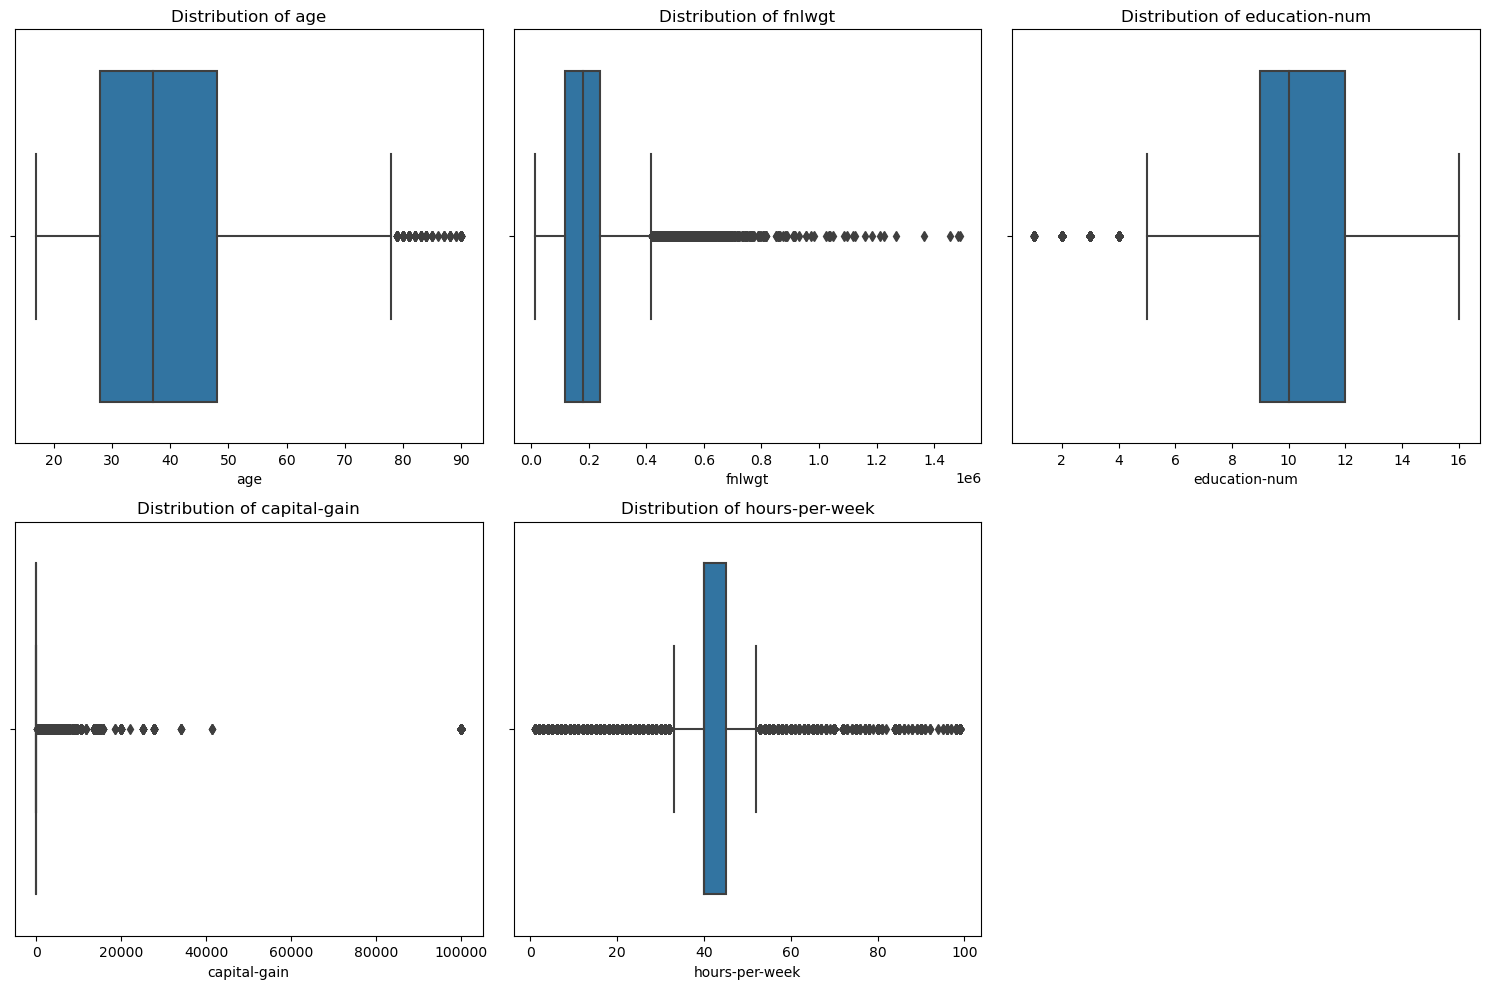

In [63]:
features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=feature)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

📝 Quan sát đồ thị `boxplot` của các thuộc tính, ta nhận thấy:
- Thuộc tính `education-num` có phạm vi giá trị nhỏ và không có nhiều ngoại lệ --> **Min-Max Scaling** 
- Thuộc tính `age` có phạm vị giá trị nhỏ và có khá nhiều ngoại lệ --> **Z-score Standardization** 
- Thuộc tính `capital-gain` có phạm vi giá trị rất lớn và chứa nhiều ngoại lệ. Ban đầu, Robust Scaling có vẻ phù hợp để chuẩn hoá, tuy nhiên, dữ liệu lại tập trung quanh một giá trị cố định, dẫn đến IQR xấp xỉ bằng 0. --> Z-score Standardization 
- Thuộc tính `fnlwgt` có phạm vi giá trị lớn và có rất nhiều ngoại lệ --> **Robust Scaling** 
- Thuộc tính `hours-per-week` tuy có phạm vi giá trị nhỏ nhưng lại có rất nhiều ngoại lệ ở 2 bên --> **Robust Scaling** để chuẩn hoá nhằm mục đích làm giảm tác động của ngoại lệ trong quá trình chuẩn hoá

### 📌 **4.2. Xây dựng các hàm chuẩn hóa**

**Min-max Scaling**

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \times (X_{\text{max new}} - X_{\text{min new}}) + X_{\text{min new}}
$$

Trong đó:
- $X$: giá trị ban đầu của feature.
-$X_{\text{min}}$: giá trị nhỏ nhất của feature.
- $X_{\text{max}}$: giá trị lớn nhất của feature.
- $X_{\text{max new}}$ và $X_{\text{min new}}$: khoảng giá trị mới mong muốn sau khi chuẩn hóa (thường là \([0, 1]\)).

In [64]:
# Min-Max Scaling
def min_max_scaling(df, feature, new_min=0, new_max=1):
    X = df[feature].values
    X_min = np.min(X)
    X_max = np.max(X)
    df[feature] = (df[feature] - X_min)/(X_max - X_min) * (new_max - new_min) + new_min
    # X_scaled = (X - X_min) / (X_max - X_min) * (new_max - new_min) + new_min
    # df.loc[:,feature] = X_scaled
    # df.loc[:,feature] = df[feature].astype(float)
    return df

**Z-score Standardization:**

$$
X_{\text{normalized}} = \frac{X - \mu}{\sigma}
$$

Trong đó:
- $X$: giá trị ban đầu của feature.
- $\mu$: giá trị trung bình của feature.
- $\sigma $: độ lệch chuẩn của feature.

In [65]:
def z_score_standardization(df, feature):
    X = df[feature].values
    mean = np.mean(X)
    std = np.std(X)
    if std == 0:
        print(f"Standard deviation is zero for feature: {feature}")
    else:
        df[feature] = (df[feature] - mean)/std
    return df

**Robust Scaling**

$$
X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)}
$$

Trong đó:
- $X$: giá trị ban đầu của feature.
- $\text{median}(X)$: trung vị của feature.
- $\text{IQR}(X) = Q_3 - Q_1$: khoảng tứ phân vị của feature, với $ Q_1 $ là phân vị thứ nhất (25%) và $Q_3$  là phân vị thứ ba (75%).

In [66]:
# Robust Scaling
def robust_scaling(df, feature):
    X = df[feature].values
    median = np.median(X)
    Q1 = np.percentile(X, 25)
    Q3 = np.percentile(X, 75)
    IQR = Q3 - Q1
    if IQR == 0:
        print(f"IQR is zero for feature: {feature}")
    else:
        df[feature] = (df[feature] - median)/IQR
    return df

### 📌 **4.3. Chuẩn hóa bộ dữ liệu**

**Chuẩn hoá thuộc tính `education-num` và `age`**

* `education-num` :
    -  Mật độ ngoại lệ: Gần như không có ngoại lệ.
    -  Xử lí: Không cần thực hiện xử lý ngoại lệ vì dữ liệu khá đồng đều và không chứa giá trị ngoại lệ rõ rệt. Áp dụng Min-Max Scaling trực tiếp để chuẩn hóa.
* `age`:
    - Mật độ ngoại lệ: Có một số ngoại lệ ở phía giá trị cao.
    - Xử lý: Do mật độ ngoại lệ không quá cao, có thể giữ lại những ngoại lệ này để phản ánh sự đa dạng trong độ tuổi của mẫu dữ liệu. Sử dụng Z-score Standardization để giảm tác động của các ngoại lệ này mà không cần loại bỏ chúng.


In [67]:
df = min_max_scaling(df, 'education-num')

df = z_score_standardization(df, 'age')

df[['age', 'education-num']].head()

,age,education-num
0,0.025661,0.800000
1,0.828097,0.800000
2,-0.047288,0.533333
3,1.046943,0.400000
4,-0.776775,0.800000


**Chuẩn hoá thuộc tính `capital-gain`**

- Mật độ ngoại lệ: Rất nhiều ngoại lệ và giá trị tập trung cao quanh giá trị 0.
- Xử lý: Vì các giá trị tập trung quanh 0 và số lượng ngoại lệ quá lớn, các phương pháp loại bỏ ngoại lệ thông thường như  IQR Filtering sẽ không hiệu quả. Thay vào đó:
    - Biến đổi logarit: Dùng log-transform để giảm sự chênh lệch giữa các giá trị lớn và các giá trị gần 0.
    - Z-score Standardization: Sử dụng Z-score sau khi đã biến đổi logarit để chuẩn hóa dữ liệu.

In [68]:
df['capital-gain'] = np.log1p(df['capital-gain'])
df = z_score_standardization(df, 'capital-gain')

df['capital-gain'].head(10)

0    2.843351
1   -0.298041
2   -0.298041
3   -0.298041
4   -0.298041
5   -0.298041
6   -0.298041
7   -0.298041
8    3.606987
9    3.198002
Name: capital-gain, dtype: float64

**Chuẩn hoá thuộc tính `fnlwgt`**
- Mật độ ngoại lệ: Rất nhiều ngoại lệ ở phía giá trị cao.
- Xử lý: Vì fnlwgt có nhiều ngoại lệ nhưng phân phối dữ liệu tương đối ổn định ở phần trung tâm, ta có thể:
    - Giới hạn giá trị tối đa: Cắt bớt các giá trị cực lớn (cap at the 95th percentile) để giảm ảnh hưởng của các ngoại lệ nghiêm trọng.
    - Sau đó, áp dụng Robust Scaling để chuẩn hóa.

In [69]:
q95_fnlwgt = df['fnlwgt'].quantile(0.95)
df['fnlwgt'] = np.where(df['fnlwgt'] > q95_fnlwgt, q95_fnlwgt, df['fnlwgt'])
df = min_max_scaling(df, 'fnlwgt')

**Chuẩn hoá thuộc tính `hours-per-week`**
- Mật độ ngoại lệ: Nhiều ngoại lệ ở cả hai phía cao và thấp.
- Xử lý:
    - Giới hạn giá trị: Để giảm bớt ảnh hưởng của những giờ làm việc bất thường, có thể cắt các giá trị cao/thấp quá mức (ví dụ, cắt ở 5th và 95th percentile).
    - Robust Scaling: Sau khi đã loại bỏ các giá trị ngoại lệ quá cao hoặc quá thấp, áp dụng Robust Scaling để chuẩn hóa giá trị giờ làm việc.

In [70]:
q5_hours_per_week = df['hours-per-week'].quantile(0.05)
df.loc[df['hours-per-week'] < q5_hours_per_week, 'hours-per-week'] = q5_hours_per_week
q95_hours_per_week = df['hours-per-week'].quantile(0.95)
df.loc[df['hours-per-week'] > q95_hours_per_week, 'hours-per-week'] = q95_hours_per_week

df = robust_scaling(df, 'hours-per-week')

df['hours-per-week'].head(10)

0    0.0
1   -4.4
2    0.0
3    0.0
4    0.0
5    0.0
6   -4.4
7    1.0
8    2.0
9    0.0
Name: hours-per-week, dtype: float64

**Trực quan hóa lại dữ liệu sau khi chuẩn hóa**

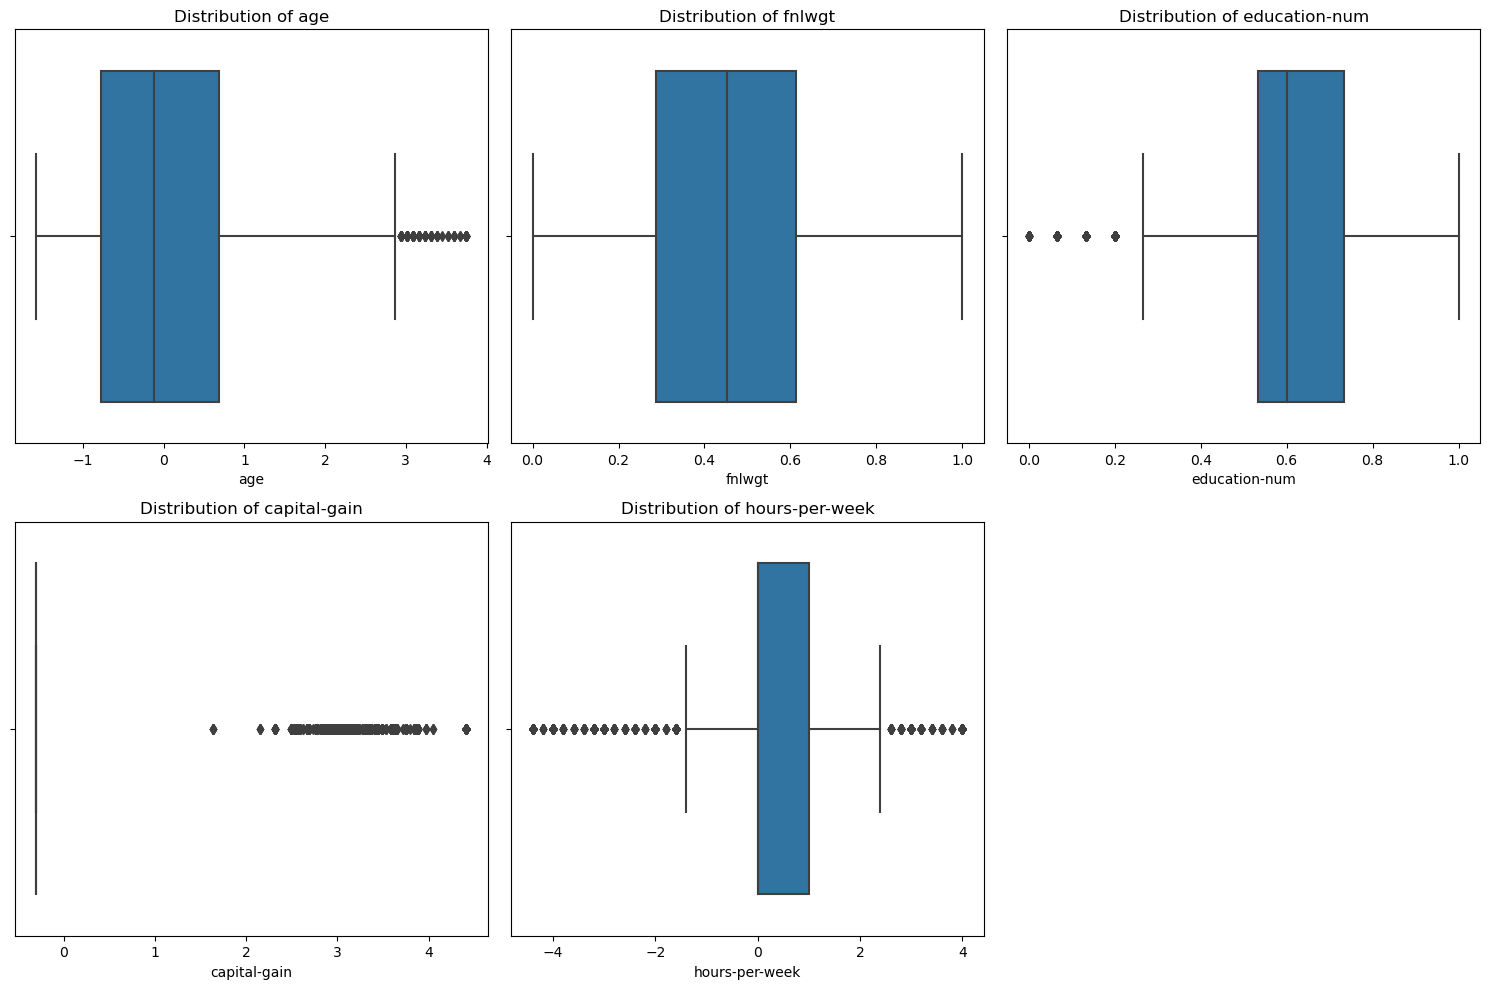

In [71]:
features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=feature)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [72]:
df

,age,fnlwgt,education-num,capital-gain,hours-per-week,>50K,Own-child
0,0.025661,0.177630,0.800000,2.843351,0.0,0,0
1,0.828097,0.193410,0.800000,-0.298041,-4.4,0,0
2,-0.047288,0.553771,0.533333,-0.298041,0.0,0,0
3,1.046943,0.605714,0.400000,-0.298041,0.0,0,0
4,-0.776775,0.888066,0.800000,-0.298041,0.0,0,0
...,...,...,...,...,...,...,...
48800,0.025661,0.553153,0.800000,-0.298041,-0.8,0,0
48801,1.849379,0.841757,0.533333,-0.298041,0.0,0,0
48802,-0.047288,0.987660,0.800000,-0.298041,2.0,0,0
48803,0.390405,0.194990,0.800000,3.219302,0.0,0,1


In [73]:
df.to_csv('adult_normalized.csv', index=False)

## 5️⃣ **Data Discretization**
Data discretization là một kỹ thuật tiền xử lý giúp biến đổi dữ liệu liên tục thành các khoảng (bins). Việc này giúp đơn giản hóa dữ liệu, giảm nhiễu, và cải thiện hiệu suất của một số thuật toán Machine Learning, đặc biệt là các mô hình dựa trên cây quyết định hoặc mô hình thống kê.

📌 **Lợi ích của Data Discretization:**
- Biến đổi dữ liệu liên tục thành dữ liệu rời rạc để dễ phân tích hơn.
- Giảm độ phức tạp của mô hình.
- Hữu ích khi dữ liệu có phân phối không đồng đều.
- Cải thiện hiệu suất của các thuật toán không hỗ trợ dữ liệu liên tục.



In [74]:
df = pd.read_csv('adult_normalized.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48805 entries, 0 to 48804
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48805 non-null  float64
 1   fnlwgt          48805 non-null  float64
 2   education-num   48805 non-null  float64
 3   capital-gain    48805 non-null  float64
 4   hours-per-week  48805 non-null  float64
 5   >50K            48805 non-null  int64  
 6   Own-child       48805 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 2.6 MB


### 📌 **Trực quan hóa các dữ liệu liên tục**

Ta tiến hành trực quan hóa phân bố của các thuộc tính bằng histogram:
- age
- fnilwgt
- education-num
- capital-gain
- hours-per-week

Quan sát biểu đồ histogram, đưa ra hướng giải quyết, với các method:
- Equal-width binning (Khoảng cách đều nhau): Chia dữ liệu thành 𝑘 khoảng có độ rộng bằng nhau.
- Equal-depth binning (Tần suất đều nhau): Chia dữ liệu sao cho mỗi bin có số lượng phần tử xấp xỉ nhau.
- Histogram-based discritization: sử dụng tần suất thực tế từ histogram để xác định ranh giới bin.

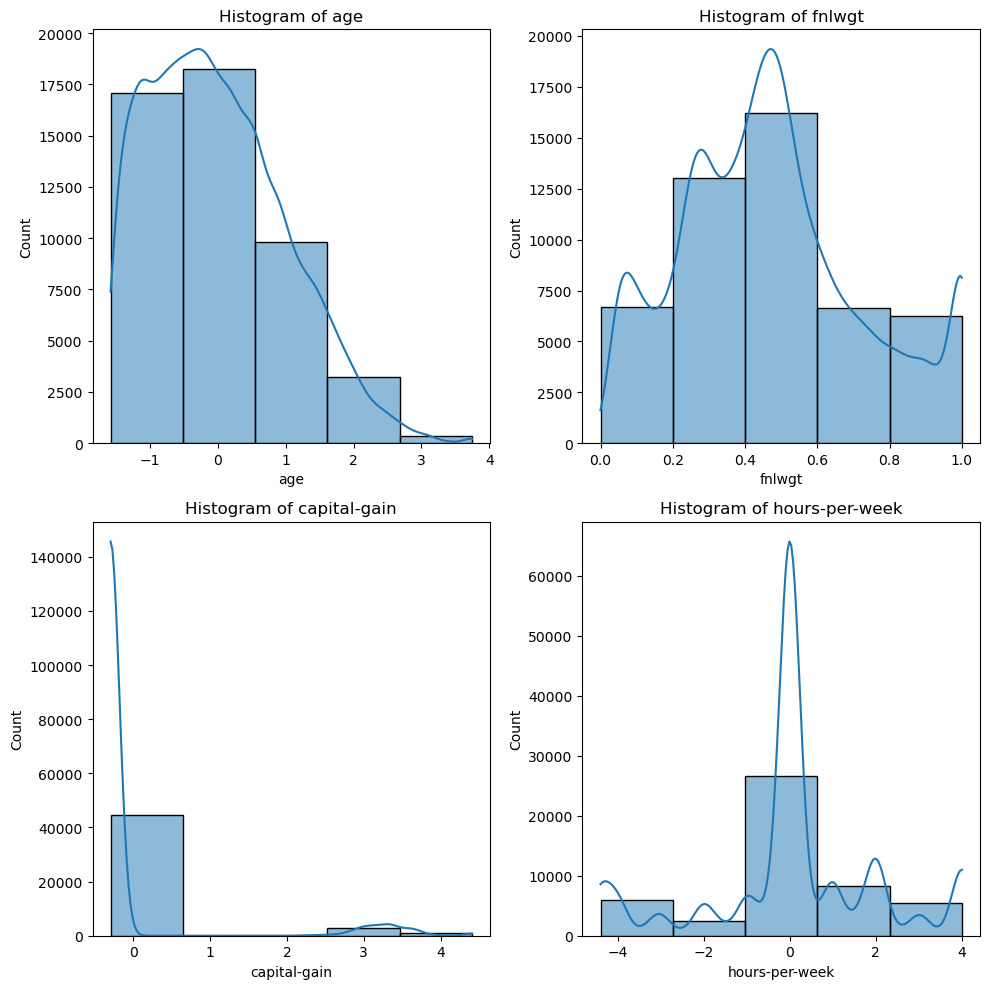

In [75]:
features = ['age', 'fnlwgt', 'capital-gain', 'hours-per-week']
# histogram
plt.figure(figsize=(10, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], bins=5, kde=True)
    plt.title(f"Histogram of {feature}")
plt.tight_layout()
plt.show()

📝 Quan sát đồ thị `histogram` của các thuộc tính, ta nhận thấy:
- Thuộc tính `age`: lệch phải, trải rộng từ giá trị thấp đến cao với sự phân bổ tương đối đồng đều ở nhiều phần khác nhau --> **Equal-width binning** 
- Thuộc tính `capital-gain`: phân phối rất lệch với đa số giá trị tập trung ở khoảng 0, có cấu trúc rõ ràng. --> **Histogram-based** 
- Thuộc tính `fnlwgt`: phân bố trãi rộng, với dữ liệu tập trung nhiều ở khoảng trung tâm. --> **Equal-depth binning**  
- Thuộc tính `hours-per-week`: dữ liệu tập trung rất nhiều ở giữa, đối xứng 2 bên.  --> **Equal-width binning**


### 📌 **5.2. Xây dựng hàm binning**



**Equal-width binning:**

Chia miền giá trị của thuộc tính thành các khoảng có độ rộng bằng nhau.
$$width = \frac{max(X) - min(X)}{k}$$
 
Kỹ thuật này phù hợp với dữ liệu có phân phối gần chuẩn hoặc ít lệch.


In [76]:
def equal_width_binning(series, num_bins):
    """
    Chia dữ liệu thành các bin có độ rộng bằng nhau.
    
    Parameters:
    - series: Pandas Series (cột dữ liệu)
    - num_bins: Số lượng bin

    Returns:
    - Series chứa nhãn bin tương ứng
    - Mảng chứa giá trị ranh giới của các bin
    """
    bins = np.linspace(series.min(), series.max(), num_bins + 1)  # Tạo các khoảng đều nhau
    bin_labels = range(1, num_bins + 1)  # Nhãn cho các bin
    binned_series = pd.cut(series, bins=bins, labels=bin_labels, include_lowest=True, duplicates='drop')
    
    return binned_series, bins

**Equal-depth binning:**

Chia dữ liệu sao cho mỗi bin có số lượng phần tử xấp xỉ nhau.
$$ \text{bin edges} = percentile(data,(0,\frac{1}{k}, \frac{2}{k},...)]$$
Kỹ thuật này phù hợp với dữ liệu có phân phối lệch hoặc nhiều outliers.


In [77]:
def equal_depth_binning(series, num_bins):
    """
    Chia dữ liệu thành các bin có số lượng phần tử xấp xỉ nhau.

    Parameters:
    - series: Pandas Series (cột dữ liệu)
    - num_bins: Số lượng bin

    Returns:
    - Series chứa nhãn bin tương ứng
    - Mảng chứa giá trị ranh giới của các bin
    """
    data = series.values
    
    quantiles = np.linspace(0, 1, num_bins + 1)  # Chia theo phân vị
    bins = np.quantile(data, quantiles)  # Lấy giá trị tại các phân vị
    while len(np.unique(bins)) < num_bins + 1:
        print("Trùng giá trị, giảm số lượng bin...")
        num_bins -= 1
        quantiles = np.linspace(0, 1, num_bins + 1)
        bins = np.quantile(data, quantiles)

    bin_labels = range(1, num_bins + 1)  # Nhãn cho các bin
    
    return pd.cut(series, bins=bins, labels=bin_labels, include_lowest=True, duplicates="drop"), bins

**Histogram-based binning** 

Tìm các ranh giới bin dựa trên sự phân bố tự nhiên của dữ liệu.
- Sử dụng thuật toán tìm bin tự động (`np.histogram_bin_edges`) để xác định bin tối ưu.
- Thích hợp với dữ liệu có phân phối không đều hoặc quá nhiều outliers.

In [78]:
def histogram_based(series, bins='auto'):
    """
    Chia dữ liệu thành các bin dựa trên histogram (sử dụng phương pháp tìm bin tối ưu).
    
    Args:
    - series: Dữ liệu cần phân loại.
    - bins (int or str): Số bin hoặc phương pháp tự động ('auto', 'sturges', 'fd', ...).

    Returns:
    - Series chứa nhãn bin tương ứng
    - Mảng chứa giá trị ranh giới của các bin
    """
    bin_edges = np.histogram_bin_edges(series, bins=bins)
    bin_labels = range(1, len(bin_edges))
    binned_series = pd.cut(series, bins=bin_edges, labels=bin_labels, include_lowest=True)
    
    return binned_series, bin_edges

### 📌 **5.3. Rời rạc hóa dữ liệu** 

**Equal-width binning:** Thuộc tính `age` và `hours-per-week`

In [79]:
df['age_bin'], age_bins = equal_width_binning(df['age'], 5)
df['hours-per-week_bin'], hours_per_week_bins = equal_width_binning(df['hours-per-week'], 5)

print(df['age_bin'].value_counts())
print("age_bins:", age_bins)
print()
print(df['hours-per-week_bin'].value_counts())
print("hours_per_week_bins:", hours_per_week_bins)

2    18268
1    17096
3     9836
4     3233
5      372
Name: age_bin, dtype: int64
age_bins: [-1.57921107 -0.51415962  0.55089182  1.61594327  2.68099471  3.74604616]

3    26696
4     8309
1     5945
5     5414
2     2441
Name: hours-per-week_bin, dtype: int64
hours_per_week_bins: [-4.4  -2.72 -1.04  0.64  2.32  4.  ]


In [80]:
df[['age', 'age_bin', 'hours-per-week', 'hours-per-week_bin']].head(10)

,age,age_bin,hours-per-week,hours-per-week_bin
0,0.025661,2,0.0,3
1,0.828097,3,-4.4,1
2,-0.047288,2,0.0,3
3,1.046943,3,0.0,3
4,-0.776775,1,0.0,3
5,-0.120236,2,0.0,3
6,0.755148,3,-4.4,1
7,0.973994,3,1.0,4
8,-0.557929,1,2.0,4
9,0.244507,2,0.0,3


**Equal-depth binning:** Thuộc tính `flnwgt`

In [81]:
df['fnlwgt_bin'], fnlwgt_bins = equal_depth_binning(df['fnlwgt'], num_bins=5)
print(df['fnlwgt_bin'].value_counts())
print("fnlwgt_bins:", fnlwgt_bins)

3    9763
1    9761
2    9761
5    9761
4    9759
Name: fnlwgt_bin, dtype: int64
fnlwgt_bins: [0.         0.25538192 0.39662489 0.50116603 0.67527781 1.        ]


In [82]:
df[['fnlwgt', 'fnlwgt_bin']].head(10)

,fnlwgt,fnlwgt_bin
0,0.177630,1
1,0.193410,1
2,0.553771,4
3,0.605714,4
4,0.888066,5
5,0.741490,5
6,0.402751,3
7,0.537421,4
8,0.091213,1
9,0.400741,3


**Histogram-based discritization:** thuộc tính `capital-gain`

In [83]:
df['capital-gain_bin'], capital_gain_bins = histogram_based(df['capital-gain'], bins=2)
df['capital-gain_bin'].value_counts()

1    44778
2     4027
Name: capital-gain_bin, dtype: int64

### 📌 **5.3. Trực quan hóa dữ liệu sau khi binning**

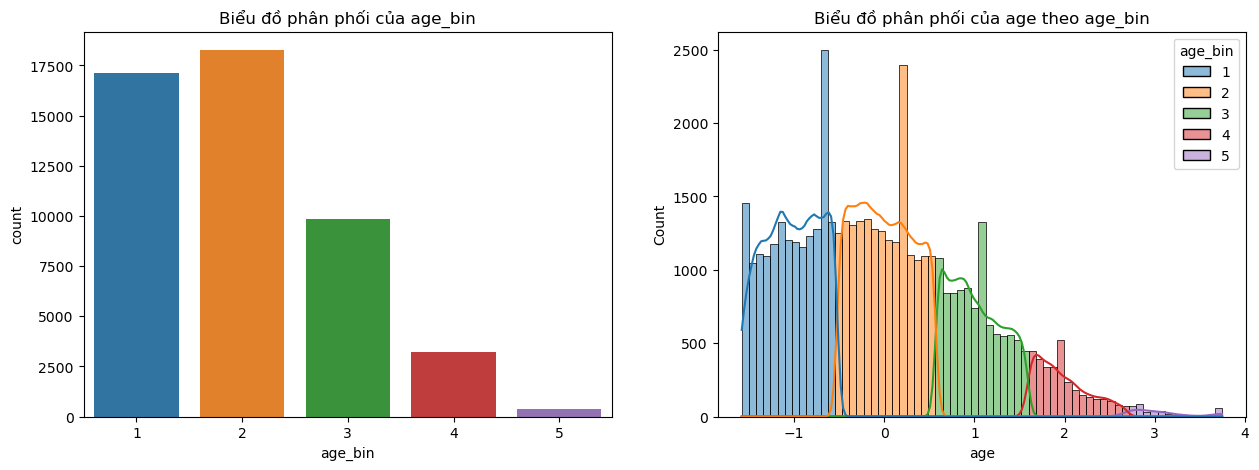

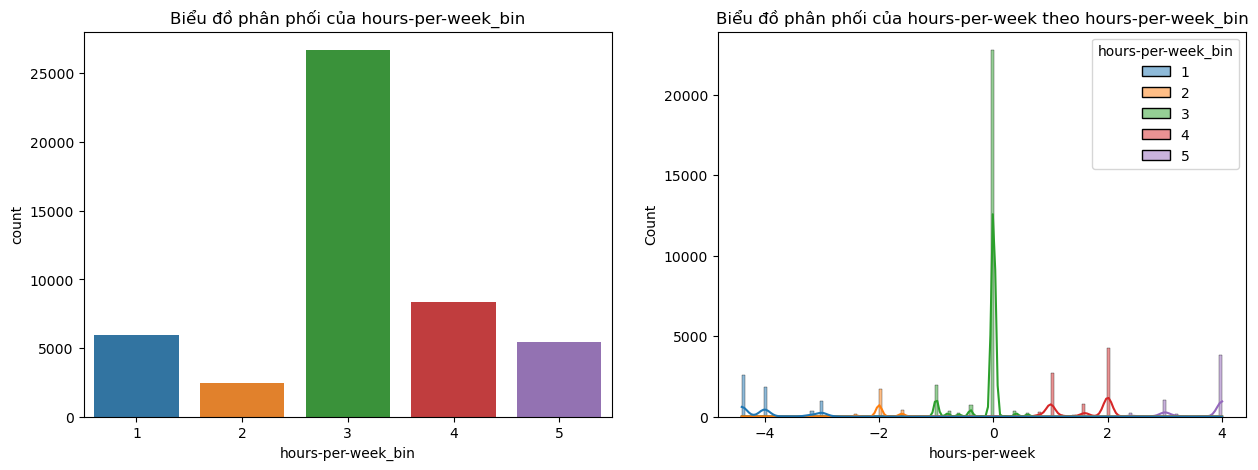

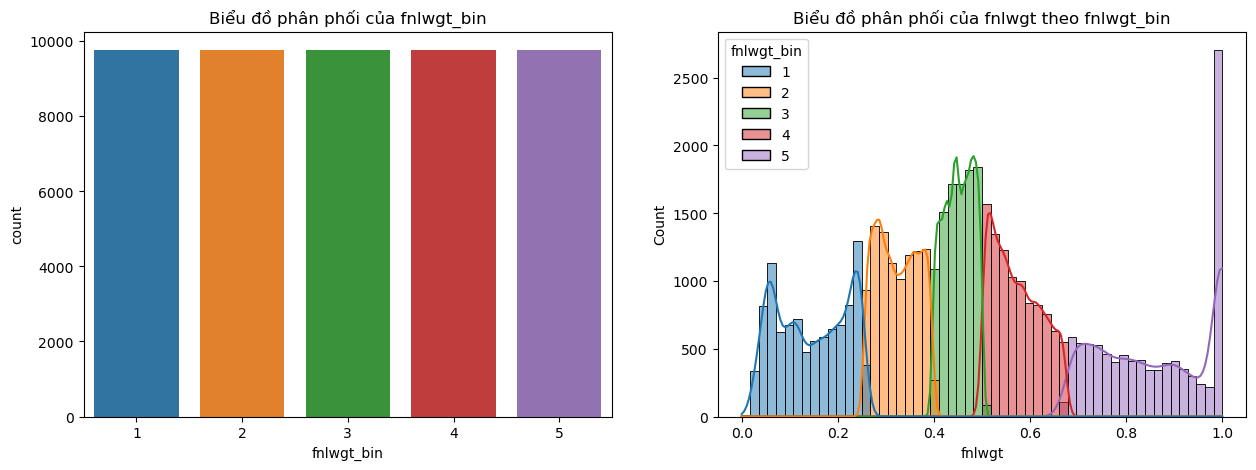

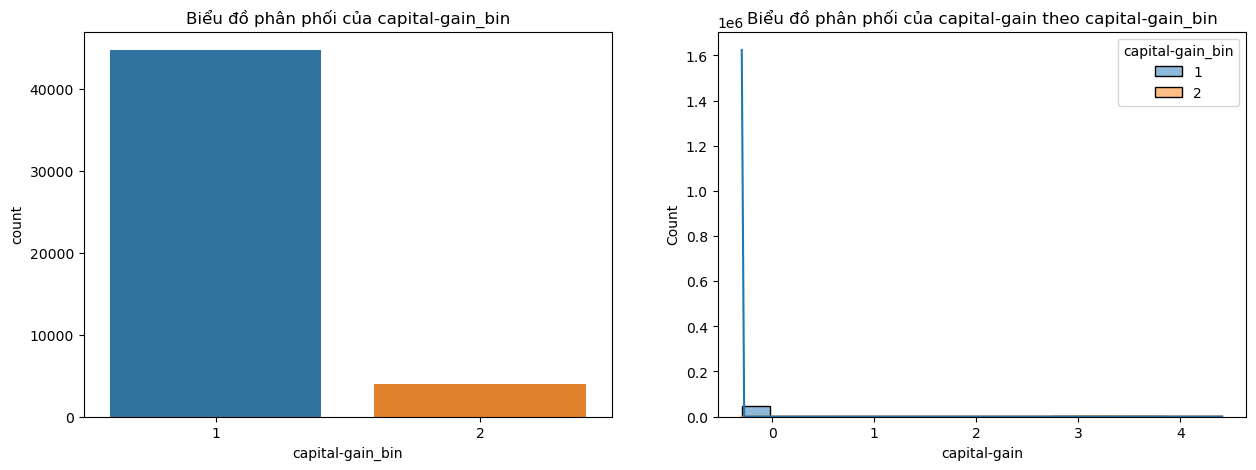

In [84]:
def plot_binned_distribution(df, bin_column, feature_column):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=bin_column)
    plt.title(f"Biểu đồ phân phối của {bin_column}")
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=feature_column, hue=bin_column, kde=True)
    plt.title(f"Biểu đồ phân phối của {feature_column} theo {bin_column}")
    plt.show()

plot_binned_distribution(df, 'age_bin', 'age')
plot_binned_distribution(df, 'hours-per-week_bin', 'hours-per-week')
plot_binned_distribution(df, 'fnlwgt_bin', 'fnlwgt')
plot_binned_distribution(df, 'capital-gain_bin', 'capital-gain')

In [85]:
df.drop(['age', 'hours-per-week', 'fnlwgt', 'capital-gain'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48805 entries, 0 to 48804
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   education-num       48805 non-null  float64 
 1   >50K                48805 non-null  int64   
 2   Own-child           48805 non-null  int64   
 3   age_bin             48805 non-null  category
 4   hours-per-week_bin  48805 non-null  category
 5   fnlwgt_bin          48805 non-null  category
 6   capital-gain_bin    48805 non-null  category
dtypes: category(4), float64(1), int64(2)
memory usage: 1.3 MB


In [86]:
df.to_csv('adult_preprocessed.csv', index=False)

## 💫 **Tổng kết**

Sau khi trải qua 5 bước thu nhập và tiền xử lí dữ liệu, bao gồm:
1. Thu nhập dữ liệu.
2. Làm sạch dữ liệu
3. Chọn lọc đặc trưng
4. Chuẩn hóa dữ liệu

In [87]:
df = pd.read_csv('adult_preprocessed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48805 entries, 0 to 48804
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   education-num       48805 non-null  float64
 1   >50K                48805 non-null  int64  
 2   Own-child           48805 non-null  int64  
 3   age_bin             48805 non-null  int64  
 4   hours-per-week_bin  48805 non-null  int64  
 5   fnlwgt_bin          48805 non-null  int64  
 6   capital-gain_bin    48805 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 2.6 MB


Ta có dataset bao gồm 48805 dòng, 7 cột, trong đó:

**6 cột thuộc tính:**
- `education-num`: số năm học tập, đã được chuẩn hóa Min-max Scaling từ dữ liệu gốc.
- `Own-child`: one-hot encoding từ thuộc tính `relationships`, xét mối quan hệ có là con của chủ hộ hay không.
- `agg_bin`: phân lớp tuổi, được chuẩn hóa Z-score xử lí ngoại lệ và rời rạc hóa.
- `hours-per-week_bin`: phân lớp số giờ làm việc, được chuẩn hóa xử lí ngoại lệ với Robust scaling và rời rạc hóa.
- `fnlwgt_bin`: phân lớp trọng số khảo sát, được chuẩn hóa xử lí ngoại lệ và rời rạc hóa.
- `capital-gain_bin`: phân lớp lãi đầu tư, được xử lí chuẩn hóa với log-transform, Z-score và rời rạc hóa.

**Target:** `>50K`: thu nhập có trên 50K hay không, được binary-encoding từ `income`.

In [88]:
df.head(10)

,education-num,>50K,Own-child,age_bin,hours-per-week_bin,fnlwgt_bin,capital-gain_bin
0,0.800000,0,0,2,3,1,2
1,0.800000,0,0,3,1,1,1
2,0.533333,0,0,2,3,4,1
3,0.400000,0,0,3,3,4,1
4,0.800000,0,0,1,3,5,1
5,0.866667,0,0,2,3,5,1
6,0.266667,0,0,3,1,3,1
7,0.533333,1,0,3,4,4,1
8,0.866667,1,0,1,4,1,2
9,0.800000,1,0,2,3,3,2
